In [28]:
!gdown --id 1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s
To: /content/GroceriesInitial.csv
100% 823k/823k [00:00<00:00, 10.4MB/s]


In [29]:
import pandas as pd


dataset = pd.read_csv('/content/GroceriesInitial.csv', header = 0)
dataset.head()

,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Άσκηση 1
## Μετασχηματισμός και ανάλυση πρωτογενών δεδομένων

In [30]:
dataset.describe()

,id,basket_value,recency_days
count,7536.000000,7536.000000,7536.000000
mean,4920.079485,5.036584,37.814225
std,2845.875602,3.692088,25.113222
min,1.000000,1.100000,1.000000
25%,2419.500000,2.200000,12.000000
50%,4927.000000,4.100000,37.000000
75%,7375.250000,7.000000,63.000000
max,9835.000000,25.100000,76.000000


Από τον παραπάνω πίνακα μπορούμε να εξάγουμε συμπεράσματα για τις τιμές των διάφορων μετρικών για το πεδίο basket_value και το recency_days.

### Ανάλυση Δεδομένων - Οπτικοποιήσεις

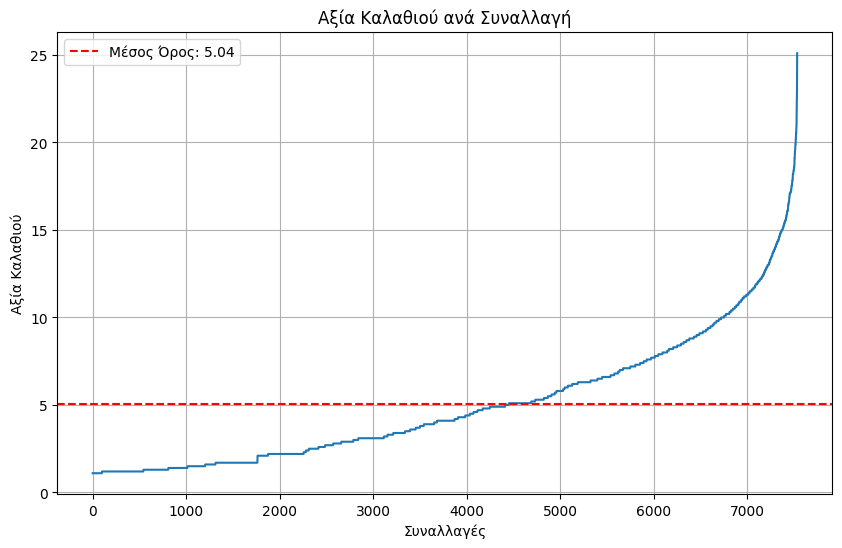

In [31]:
# @title Αξία Καλαθιού ανά Συναλλαγή

import matplotlib.pyplot as plt

# Ομαδοποίηση δεδομένων ανά id
transactions_per_basket_value = dataset.groupby('id').size()

# Δημιουργία γραφήματος
plt.figure(figsize=(10, 6))
total_basket_value = dataset.groupby('id')['basket_value'].sum()
plt.plot(range(len(total_basket_value.index)), sorted(total_basket_value.values))
plt.title('Αξία Καλαθιού ανά Συναλλαγή')
plt.xlabel('Συναλλαγές')
plt.ylabel('Αξία Καλαθιού')

# Προσθήκη της οριζόντιας γραμμής για τον μέσο όρο
mean_value = dataset['basket_value'].mean()
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Μέσος Όρος: {round(mean_value, 2)}')

plt.legend()
plt.grid(True)
plt.show()

Στο παραπάνω γράφημα απεικονίζεται η αξία του κάθε καλαθιού ανά συναλλαγή σε αύξουσα σειρά, ενώ επισημαίνεται επίσης η μέση αξία καλαθιού. Έτσι μπορούμε να δούμε το πώς κυμαίνεται η αξία της κάθε συναλλαγής και πόσο απέχει η κάθε μία από τη μέση τιμή. Μάλιστα φαίνεται από το γράφημα ότι οι περισσότερες συναλλαγές βρίσκονται κάτω από τη μέση τιμή, αυτό μπορεί να οφείλεται στο γεγονός ότι οι καταναλωτές συχνά προτιμούν να αγοράζουν λιγότερα προϊόντα ή προϊόντα με χαμηλότερη αξία κατά την κάθε συναλλαγή.Παρατηρούμε επίσης, ότι οι τιμές που ξεπερνούν τη μέση τιμή ανήκουν σε μεγαλύτερο εύρος, κάτι που φαίνεται από την κλίση της καμπύλης και μπορεί να αντιστοιχεί σε μεγαλύτερη ποικιλία προϊόντων ή σε αγορές που περιλαμβάνουν προϊόντα με υψηλότερες τιμές, όπως ακριβά αντικείμενα ή προϊόντα πολυτελείας.

In [32]:
# @title Πλήθος συναλλαγών ανά περίπτωση με βάση την αξία τους

# Υπολογισμός μέγιστης και ελάχιστης αξίας
max_value = dataset['basket_value'].max()
min_value = dataset['basket_value'].min()

# Υπολογισμός πλήθους συναλλαγών για κάθε περίπτωση
transactions_max = (dataset['basket_value'] == max_value).sum()
transactions_min = (dataset['basket_value'] == min_value).sum()
transactions_above_mean = (dataset['basket_value'] > mean_value).sum()
transactions_below_mean = (dataset['basket_value'] < mean_value).sum()

# Εκτύπωση αποτελεσμάτων
print(f"Πλήθος συναλλαγών με αξία ίση με τη μέγιστη: {transactions_max}")
print(f"Πλήθος συναλλαγών με αξία ίση με την ελάχιστη: {transactions_min}")
print(f"Πλήθος συναλλαγών με αξία πάνω από το μέσο όρο: {transactions_above_mean}")
print(f"Πλήθος συναλλαγών με αξία κάτω από το μέσο όρο: {transactions_below_mean}")

Πλήθος συναλλαγών με αξία ίση με τη μέγιστη: 1
Πλήθος συναλλαγών με αξία ίση με την ελάχιστη: 100
Πλήθος συναλλαγών με αξία πάνω από το μέσο όρο: 3085
Πλήθος συναλλαγών με αξία κάτω από το μέσο όρο: 4451


Με τους παραπάνω υπολογισμούς ήθελα να δω το πλήθος των συναλλαγών που έχουν αξία ίση με τη μέγιστη, την ελάχιστη και τη μέση τιμή, καθώς επίσης και το πλήθος αυτών που βρίσκονται πάνω και κάτω από το μέσο όρο. Κάτι τέτοιο, σε συνδυασμό με την απόκλιση των συναλλαγών από τις συγκεκριμένες τιμές θα μπορούσε να αποτελέσει τη βάση για το διαχωρισμό της αξίας συναλλαγής σε χαμηλή, μέση και υψηλή.

Μέγιστη ημερήσια συνολική αξία συναλλαγών: 1360.8 που πραγματοποιήθηκε πριν από 26 μέρες
Ελάχιστη ημερήσια συνολική αξία συναλλαγών: 146.7 που πραγματοποιήθηκε πριν από 65 μέρες
Μέση ημερήσια συνολική αξία συναλλαγών: 499.42
Πλήθος ημερών με ημερήσια συνολική αξία πάνω από τη μέση τιμή: 33
Πλήθος ημερών με ημερήσια συνολική αξία κάτω από τη μέση τιμή: 43


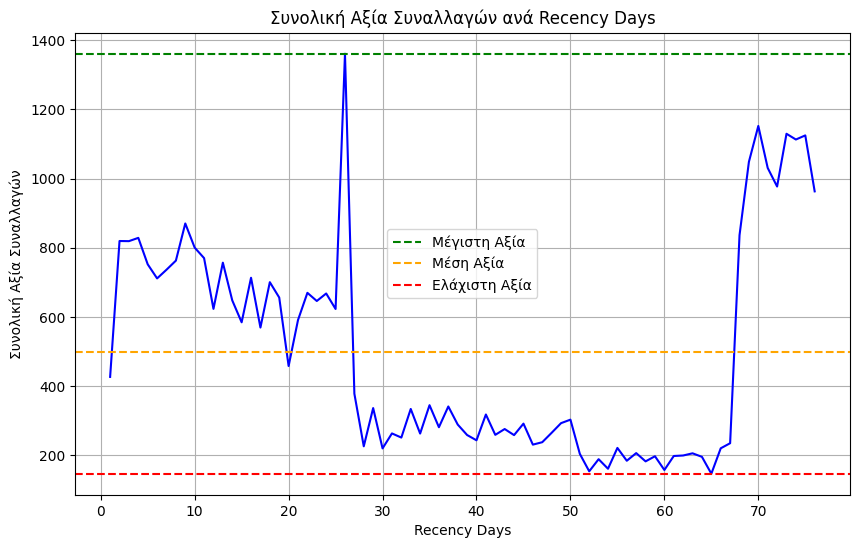

In [33]:
# @title Συνολική αξία συναλλαγών με βάση το πέρας των ημερών

# Ομαδοποίηση δεδομένων ανά recency days και υπολογισμός της συνολικής αξίας
total_value_by_recency = dataset.groupby('recency_days')['basket_value'].sum().reset_index()

# Δημιουργία γραφήματος
plt.figure(figsize=(10, 6))
plt.plot(total_value_by_recency['recency_days'], total_value_by_recency['basket_value'], color='b')
plt.title('Συνολική Αξία Συναλλαγών ανά Recency Days')
plt.xlabel('Recency Days')
plt.ylabel('Συνολική Αξία Συναλλαγών')

# Ομαδοποίηση των δεδομένων ανά recency day και υπολογισμός του συνολικού άθροισματος για κάθε ομάδα
total_value_by_recency = dataset.groupby('recency_days')['basket_value'].sum()

# Υπολογισμός μέγιστης, μέσης και ελάχιστης τιμής
max_total_value = total_value_by_recency.max()
mean_total_value = total_value_by_recency.mean()
min_total_value = total_value_by_recency.min()

# Εύρεση recency day με τη μεγαλύτερη αξία
recency_day_max = total_value_by_recency.idxmax()

# Εύρεση recency day με τη μικρότερη αξία
recency_day_min = total_value_by_recency.idxmin()

print("Μέγιστη ημερήσια συνολική αξία συναλλαγών:", round(max_total_value, 2), "που πραγματοποιήθηκε πριν από", recency_day_max, "μέρες")
print("Ελάχιστη ημερήσια συνολική αξία συναλλαγών:", round(min_total_value, 2), "που πραγματοποιήθηκε πριν από", recency_day_min, "μέρες")
print("Μέση ημερήσια συνολική αξία συναλλαγών:", round(mean_total_value, 2))

# Υπολογισμός του αριθμού των recency days που έχουν αξία πάνω από τη μέση τιμή
above_mean = (total_value_by_recency > mean_total_value).sum()

# Υπολογισμός του αριθμού των recency days που έχουν αξία κάτω από τη μέση τιμή
below_mean = (total_value_by_recency < mean_total_value).sum()

print("Πλήθος ημερών με ημερήσια συνολική αξία πάνω από τη μέση τιμή:", above_mean)
print("Πλήθος ημερών με ημερήσια συνολική αξία κάτω από τη μέση τιμή:", below_mean)

# Προσθήκη οριζόντιων γραμμών για τη μέγιστη, ελάχιστη και μέση αξία
plt.axhline(max_total_value, color='g', linestyle='--', label='Μέγιστη Αξία')
plt.axhline(mean_total_value, color='orange', linestyle='--', label='Μέση Αξία')
plt.axhline(min_total_value, color='r', linestyle='--', label='Ελάχιστη Αξία')

plt.legend()
plt.grid(True)
plt.show()

Για το παραπάνω γράφημα ομαδοποίησα τις συναλλαγές με βάση το πόσες μέρες έχουν περάσει από όταν έγιναν. Επιπλέον υπολόγισα τη μέγιστη, ελάχιστη και μέση αξία, καθώς επίσης και το πόσες ομάδες βρίσκονται πάνω και κάτω από το μέσο όρο αντίστοιχα. Παρατηρώ πάντως ότι τις περισσότερες μέρες βρισκόμαστε κάτω από τον μέσο όρο. Από το γράφημα μπορούμε να δούμε το ύψος των ημερησίων συναλλαγών κατά το πέρασμα των ημερών. Φαίνεται ότι τις τελευταίες 26 και τις πρώτες 5 μέρες η πλειοψηφία των εσόδων βρίσκεται πάνω από τη μέση τιμή, ενώ στο ενδιάμεσο διάστημα κάτω από τη μέση τιμή. Αυτό μπορεί να σημαίνει ότι στην πρώτη περίπτωση έγιναν είτε περισσότερες συναλλαγές, είτε μεγαλύτερης αξίας, συγκριτικά με τη δεύτερη περίπτωση.

Μέγιστο ημερήσιο πλήθος συναλλαγών: 191 που πραγματοποιήθηκε πριν από 70 μέρες
Ελάχιστο ημερήσιο πλήθος συναλλαγών: 53 που πραγματοποιήθηκε πριν από 20 μέρες
Μέσο ημερήσιο πλήθος συναλλαγών: 99
Πλήθος ημερών με ημερήσιο πλήθος συναλλαγών πάνω από το μέσο όρο: 21
Πλήθος ημερών με ημερήσιο πλήθος συναλλαγών κάτω από το μέσο όρο: 55


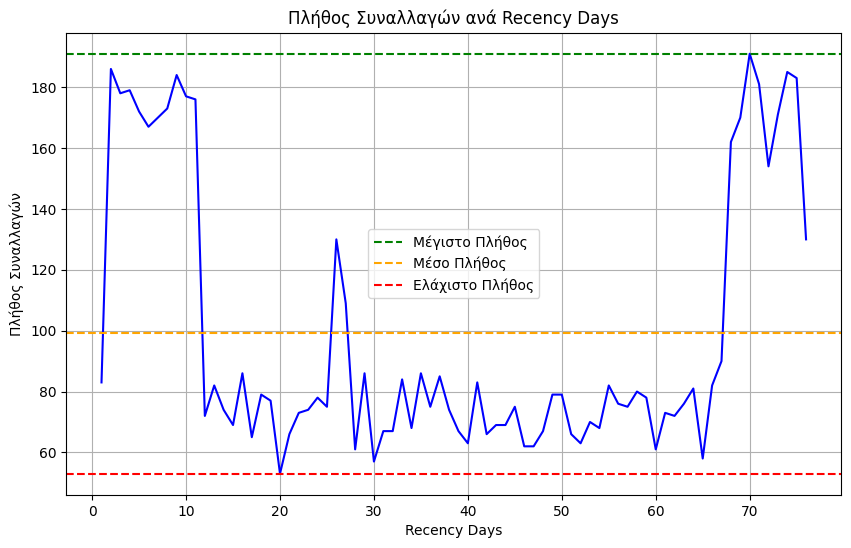

In [34]:
# @title Πλήθος συναλλαγών με βάση το πέρας των ημερών

# Ομαδοποίηση των δεδομένων ανά recency day και υπολογισμός του πλήθους των συναλλαγών
transactions_count_by_recency = dataset.groupby('recency_days')['basket_value'].size().reset_index(name='transactions_count')

# Δημιουργία γραφήματος
plt.figure(figsize=(10, 6))
plt.plot(transactions_count_by_recency['recency_days'], transactions_count_by_recency['transactions_count'], color='b')
plt.title('Πλήθος Συναλλαγών ανά Recency Days')
plt.xlabel('Recency Days')
plt.ylabel('Πλήθος Συναλλαγών')

# Ομαδοποίηση των δεδομένων ανά recency day και υπολογισμός του πλήθους των συναλλαγών για κάθε ομάδα
transactions_count_by_recency = dataset.groupby('recency_days')['basket_value'].size()

# Υπολογισμός του μέγιστου, ελάχιστου και μέσου πλήθους συναλλαγών
max_transactions = transactions_count_by_recency.max()
min_transactions = transactions_count_by_recency.min()
mean_transactions = transactions_count_by_recency.mean()

# Εύρεση recency days με το μεγαλύτερο και το μικρότερο πλήθος συναλλαγών
recency_day_max_transactions = transactions_count_by_recency.idxmax()
recency_day_min_transactions = transactions_count_by_recency.idxmin()

print("Μέγιστο ημερήσιο πλήθος συναλλαγών:", max_transactions, "που πραγματοποιήθηκε πριν από", recency_day_max_transactions, "μέρες")
print("Ελάχιστο ημερήσιο πλήθος συναλλαγών:", min_transactions, "που πραγματοποιήθηκε πριν από", recency_day_min_transactions, "μέρες")
print("Μέσο ημερήσιο πλήθος συναλλαγών:", round(mean_transactions))

# Υπολογισμός αριθμού recency days με πλήθος συναλλαγών πάνω από το μέσο όρο
above_mean_transactions = (transactions_count_by_recency > mean_transactions).sum()

# Υπολογισμός αριθμού recency days με πλήθος συναλλαγών κάτω από το μέσο όρο
below_mean_transactions = (transactions_count_by_recency < mean_transactions).sum()

print("Πλήθος ημερών με ημερήσιο πλήθος συναλλαγών πάνω από το μέσο όρο:", above_mean_transactions)
print("Πλήθος ημερών με ημερήσιο πλήθος συναλλαγών κάτω από το μέσο όρο:", below_mean_transactions)

# Προσθήκη οριζόντιων γραμμών για τη μέγιστη, ελάχιστη και μέση αξία
plt.axhline(max_transactions, color='g', linestyle='--', label='Μέγιστο Πλήθος')
plt.axhline(mean_transactions, color='orange', linestyle='--', label='Μέσο Πλήθος')
plt.axhline(min_transactions, color='r', linestyle='--', label='Ελάχιστο Πλήθος')

plt.legend()
plt.grid(True)
plt.show()

Αντίστοιχους υπολογισμούς με πριν, κάνω και εδώ στην περίπτωση του πλήθους ημερήσιων συναλλαγών. Σε συνδυασμό με το προηγούμενο γράφημα μπορώ να συμπεράνω ότι το ύψος των ημερήσιων εσόδων τις πρώτες 5 μέρες πιθανότα οφείλεται στο αυξημένο πλήθος ημερήσιων συναλλαγών για εκείνες τις μέρες, και αντίστοιχα συμβαίνει το ίδιο και για τις τελευταίες 10. Βλέπω επίσης ότι και σε αυτή την περίπτωση τις περισσότερες ημέρες βρισκόμαστε κάτω από το μέσο όρο (και μάλιστα εδώ με μεγαλύτερη διαφορά σε σχέση με πριν).

Μέγιστος αριθμός προϊόντων ανά συναλλαγή: 32
Ελάχιστος αριθμός προϊόντων ανά συναλλαγή: 1
Μέσος αριθμός προϊόντων ανά συναλλαγή: 5
Συναλλαγές με μέγιστο αριθμό προϊόντων: 1
Συναλλαγές με ελάχιστο αριθμό προϊόντων: 816
Συναλλαγές με πλήθος προϊόντων πάνω από το μέσο: 2833
Συναλλαγές με πλήθος προϊόντων κάτω από το μέσο: 4703


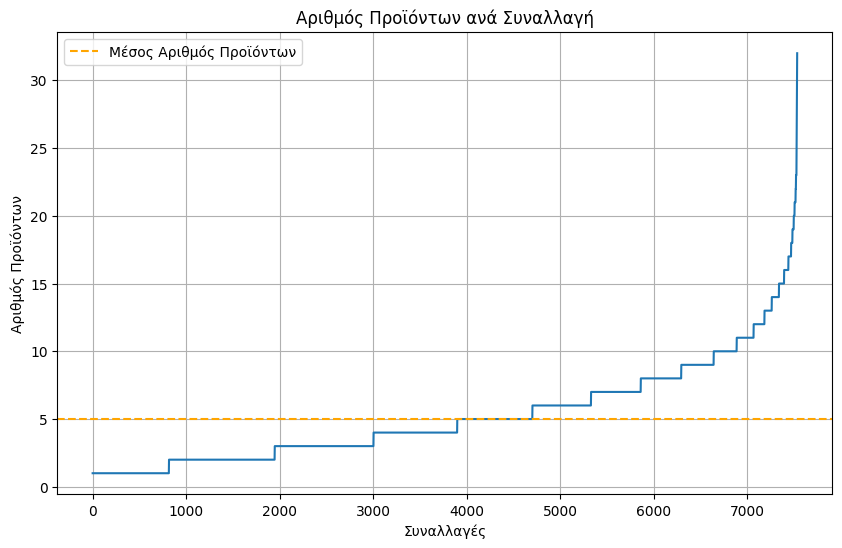

In [35]:
# @title Πλήθος προϊόντων ανά καλάθι

# Υπολογισμός του πλήθους των προϊόντων ανά συναλλαγή
products_per_transaction = dataset.drop(['id', 'recency_days', 'basket_value'], axis=1).count(axis=1)

# Υπολογισμός των μέγιστων, ελαχίστων και μέσων τιμών των προϊόντων ανά συναλλαγή
max_products_per_transaction = products_per_transaction.max()
min_products_per_transaction = products_per_transaction.min()
mean_products_per_transaction = products_per_transaction.mean()

# Υπολογισμός του αριθμού των συναλλαγών με πλήθος προϊόντων ίσο με το μέγιστο και το ελάχιστο
transactions_max_products = (products_per_transaction == max_products_per_transaction).sum()
transactions_min_products = (products_per_transaction == min_products_per_transaction).sum()

# Υπολογισμός του αριθμού των συναλλαγών με πλήθος προϊόντων πάνω και κάτω από τη μέση τιμή
transactions_above_mean = (products_per_transaction > mean_products_per_transaction).sum()
transactions_below_mean = (products_per_transaction < mean_products_per_transaction).sum()

# Εκτύπωση των μεγίστων, ελαχίστων και μέσων τιμών
print("Μέγιστος αριθμός προϊόντων ανά συναλλαγή:", max_products_per_transaction)
print("Ελάχιστος αριθμός προϊόντων ανά συναλλαγή:", min_products_per_transaction)
print("Μέσος αριθμός προϊόντων ανά συναλλαγή:", round(mean_products_per_transaction))

# Εκτύπωση του αριθμού των συναλλαγών με πλήθος προϊόντων ίσο με το μέγιστο και το ελάχιστο
print("Συναλλαγές με μέγιστο αριθμό προϊόντων:", transactions_max_products)
print("Συναλλαγές με ελάχιστο αριθμό προϊόντων:", transactions_min_products)

# Εκτύπωση του αριθμού των συναλλαγών με πλήθος προϊόντων πάνω και κάτω από τη μέση τιμή
print("Συναλλαγές με πλήθος προϊόντων πάνω από το μέσο:", transactions_above_mean)
print("Συναλλαγές με πλήθος προϊόντων κάτω από το μέσο:", transactions_below_mean)

# Δημιουργία γραφήματος
plt.figure(figsize=(10, 6))
plt.plot(range(len(products_per_transaction)), sorted(products_per_transaction))
# plt.axhline(max_products_per_transaction, color='g', linestyle='--', label='Μέγιστος Αριθμός Προϊόντων')
plt.axhline(round(mean_products_per_transaction), color='orange', linestyle='--', label='Μέσος Αριθμός Προϊόντων')
# plt.axhline(min_products_per_transaction, color='r', linestyle='--', label='Ελάχιστος Αριθμός Προϊόντων')
plt.title('Αριθμός Προϊόντων ανά Συναλλαγή')
plt.xlabel('Συναλλαγές')
plt.ylabel('Αριθμός Προϊόντων')
plt.legend()
plt.grid(True)
plt.show()

Και σε αυτή την περίπτωση βλέπουμε ότι οι περισσότερες συναλλαγές βρίσκοται κάτω από τον μέσο όρο, που σημαίνει ότι οι καταναλωτές συνήθως αγοράζουν λίγα προϊόντα. Από το γράφημα φαίνεται επιπλέον ότι το εύρος τιμών για τις συναλλαγές που βρίσκονται πάνω από τον μέσο όρο είναι πολύ μεγαλύτερο (εξαπλάσιο) συγκριτικά με αυτό κάτω από το μέσο όρο. Αυτό μας δείχνει ότι οι καταναλωτές που επιλέγουν περισσότερα προϊόντα στις συναλλαγές που κάνουν ποικίλουν μεταξύ τους περισσότερο. Οι πληροφορίες αυτες σε συνδυασμό με τη συχνότητα των συναλλαγών αυτών των καταναλωτών, καθώς επίσης και το ύψος των συναλλαγών τους, θα μπορούσαν να μας οδηγήσουν σε χρήσιμα συμπεράσματα, αν όμως είχαμε και πληροφορίες για το id του καταναλωτή που κάνει την κάθε συναλλαγή.

Μέγιστος αριθμός προϊόντων ημερησίως: 1284 που πραγματοποιήθηκε πριν από 26 μέρες
Μέσος αριθμός προϊόντων ημερησίως: 517
Ελάχιστος αριθμός προϊόντων ημερησίως: 197 που πραγματοποιήθηκε πριν από 65 μέρες
Τυπική απόκλιση από το μέσο όρο: 270.11
Πλήθος ημερών με ημερήσιο πλήθος προϊόντων πάνω από το μέσο όρο: 31
Πλήθος ημερών με ημερήσιο πλήθος προϊόντων κάτω από το μέσο όρο: 45


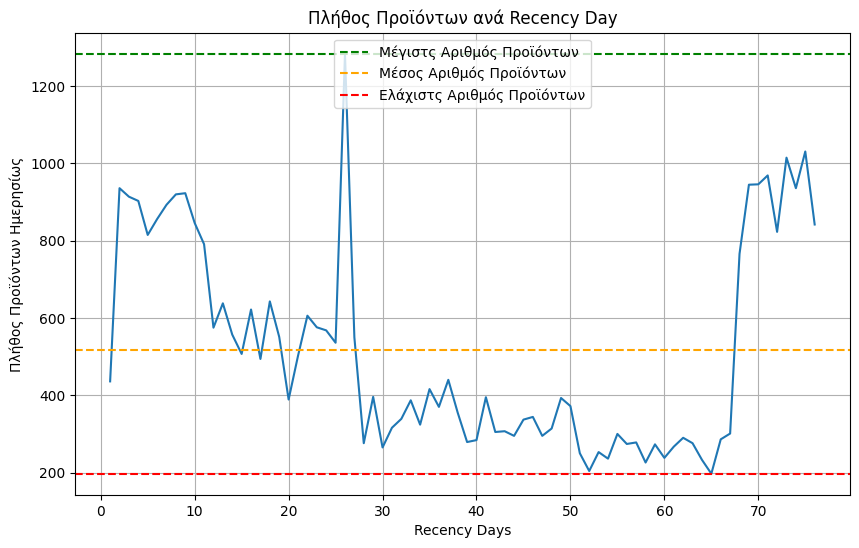

In [36]:
# @title Πλήθος προϊόντων με βάση το πέρας των ημερών

# Υπολογισμός του πλήθους των προϊόντων ανά recency days
products_per_recency_days = dataset.drop(['id', 'basket_value'], axis=1).groupby('recency_days').count().sum(axis=1)

# Υπολογισμός των μέγιστων, ελαχίστων και μέσων τιμών των προϊόντων ημερησίως
max_products_per_recency_days = products_per_recency_days.max()
min_products_per_recency_days = products_per_recency_days.min()
mean_products_per_recency_days = products_per_recency_days.mean()

# Υπολογισμός της τυπικής απόκλισης
std_deviation = products_per_recency_days.std()

# Εύρεση recency days με το μεγαλύτερο και το μικρότερο πλήθος προϊόντων
recency_day_max_products = products_per_recency_days.idxmax()
recency_day_min_products = products_per_recency_days.idxmin()

# Εκτύπωση των μεγίστων, ελαχίστων και μέσων τιμών
print("Μέγιστος αριθμός προϊόντων ημερησίως:", max_products_per_recency_days, "που πραγματοποιήθηκε πριν από", recency_day_max_products, "μέρες")
print("Μέσος αριθμός προϊόντων ημερησίως:", round(mean_products_per_recency_days))
print("Ελάχιστος αριθμός προϊόντων ημερησίως:", min_products_per_recency_days, "που πραγματοποιήθηκε πριν από", recency_day_min_products, "μέρες")
print("Τυπική απόκλιση από το μέσο όρο:", round(std_deviation, 2))

# Υπολογισμός αριθμού recency days με πλήθος προϊόντων πάνω από το μέσο όρο
above_mean_products = (products_per_recency_days > mean_products_per_recency_days).sum()

# Υπολογισμός αριθμού recency days με πλήθος προϊόντων κάτω από το μέσο όρο
below_mean_products = (products_per_recency_days < mean_products_per_recency_days).sum()

print("Πλήθος ημερών με ημερήσιο πλήθος προϊόντων πάνω από το μέσο όρο:", above_mean_products)
print("Πλήθος ημερών με ημερήσιο πλήθος προϊόντων κάτω από το μέσο όρο:", below_mean_products)

# Δημιουργία γραφήματος
plt.figure(figsize=(10, 6))
plt.plot(products_per_recency_days.index, products_per_recency_days.values)
plt.axhline(max_products_per_recency_days, color='g', linestyle='--', label='Μέγιστς Αριθμός Προϊόντων')
plt.axhline(round(mean_products_per_recency_days), color='orange', linestyle='--', label='Μέσος Αριθμός Προϊόντων')
plt.axhline(min_products_per_recency_days, color='r', linestyle='--', label='Ελάχιστς Αριθμός Προϊόντων')
plt.title('Πλήθος Προϊόντων ανά Recency Day')
plt.xlabel('Recency Days')
plt.ylabel('Πλήθος Προϊόντων Ημερησίως')
plt.legend(loc='upper center')
plt.grid(True)
plt.show()

Και στην ημερήσια αναπαράσταση του πλήθους προϊόντων βλέπουμε ότι τις περισσότερες ημέρες βρισκόμαστε κάτω από το μέσο όρο, άρα και ημερησίως τις περισσότερες μέρες αγοράζονται λιγότερα προϊόντα. Επιπλέον, σε συνδυασμό με τα προηγούμενα αντίστοιχα γραφήματα συμπεραίνω ότι το ύψος της αξίας των ημερησίων συναλλαγών για τις τελευταίες περίπου 25 μέρες και τις πρώτες περίπου 10 μέρες, οφείλεται και στο πλήθος των προϊόντων που αγοράστηκαν ημερησίως. Μάλιστα στο διάστημα περίπου 11 με 26 τελευταίων ημερών όπου τα έσοδα ήταν ανεβασμένα αλλά το πλήθος των ημερήσιων συναλλαγών όχι, βλέπω ότι το ημερήσιο πλήθος προϊόντων είναι επίσης ανεβασμένο και συνεπώς αποτελεί αιτία για το υψηλό ύψος στα έσοδα για τις αντίστοιχες ημέρες.

### Μετασχηματισμός δεδομένων

In [37]:
# @title Μετασχηματισμός δεδομένων σε δυαδική μορφή για τα προϊόντα που μας ενδιαφέρουν

# Ορισμός προϊόντα που μας ενδιαφέρουν
desired_products = [
    'citrus fruit', 'tropical fruit', 'whole milk', 'other vegetables', 'rolls/buns',
    'chocolate', 'bottled water', 'yogurt', 'sausage', 'root vegetables', 'pastry',
    'soda', 'cream'
]

# Δημιουργία DataFrame
binary_df = dataset.iloc[:, :3].copy()

# Δημιουργία δυαδικής μορφής για τα προϊόντα που μας ενδιαφέρουν
for product in desired_products:
    binary_df[product] = dataset.apply(lambda row: 1 if product in row.values else 0, axis=1)

# Εμφάνιση 5 πρώτων στοιχείων του νέου DataFrame για έλεγχο
print(binary_df.head().to_string())

   id  basket_value  recency_days  citrus fruit  tropical fruit  whole milk  other vegetables  rolls/buns  chocolate  bottled water  yogurt  sausage  root vegetables  pastry  soda  cream
0   1           1.1             2             1               0           0                 0           0          0              0       0        0                0       0     0      0
1   2           3.6            31             0               1           0                 0           0          0              0       1        0                0       0     0      0
2   3           1.2             7             0               0           1                 0           0          0              0       0        0                0       0     0      0
3   4           6.6             7             0               0           0                 0           0          0              0       1        0                0       0     0      0
4   5           2.5            66             0               0  

Μετά τον μετασχηματισμό των δεδομένων θα αφαιρέσω τις συναλλαγές που δεν περιλαμβάνουν κανένα από τα προϊόντα που μας ενδιαφέρουν (στην ουσία είναι σαν να έχω άδεια καλάθια) για να μην αλλοιώνουν τα συμπεράσματα που θα βγάλω στη συνέχεια.

In [38]:
# @title Αφαίρεση των συναλλαγών που δεν περιλαμβάνουν κανένα από τα προϊόντα που μας ενδιαφέρουν

# Εύρεση των γραμμών με όλες τις στήλες μηδέν
zero_rows = binary_df[(binary_df.iloc[:, 3:16] == 0).all(axis=1)]

# Αφαίρεση των γραμμών με όλες τις στήλες μηδέν από το DataFrame
binary_df = binary_df.drop(zero_rows.index)

Σε αυτό το κομμάτι θα προσπαθήσω να βρω τα όρια για τη διακριτοποίηση της αξίας των συναλλαγών σε 3 ισοπληθείς κατηγορίες πειραματικά, με βάση το γράφημα που μου δείχνει την αξία συναλλαγής ανά καλάθι.

In [39]:
# @title Πείραμα 1

low = (dataset['basket_value'] <= 3).sum()
mid = ((dataset['basket_value'] > 3) & (dataset['basket_value'] <= 7)).sum()
high = (dataset['basket_value'] > 7).sum()

# Εκτύπωση αποτελεσμάτων
print(f"Low: {low}")
print(f"Mid: {mid}")
print(f"Max: {high}")

Low: 2841
Mid: 2831
Max: 1864


Στο 1ο πείραμα βλέπω ότι οι πρώτες δύο κατηγορίες είναι σχεδόν ισοπληθείς, αλλά η 3η έχει αρκετα λιγότερες συναλλαγές, οπότε θα πρέπει να τροποποιήσω τα όρια.

In [40]:
# @title Πείραμα 2

low = (dataset['basket_value'] <= 2).sum()
mid = ((dataset['basket_value'] > 2) & (dataset['basket_value'] <= 6)).sum()
high = (dataset['basket_value'] > 6).sum()

# Εκτύπωση αποτελεσμάτων
print(f"Low: {low}")
print(f"Mid: {mid}")
print(f"Max: {high}")

Low: 1763
Mid: 3319
Max: 2454


Σε αυτό το πείραμα βλέπω ότι όλες οι κατηγορίες είναι άνισες με σημαντική διαφορά.

In [41]:
# @title Πείραμα 3

low = (dataset['basket_value'] <= 2.5).sum()
mid = ((dataset['basket_value'] > 2.5) & (dataset['basket_value'] <= 6.5)).sum()
high = (dataset['basket_value'] > 6.5).sum()

# Εκτύπωση αποτελεσμάτων
print(f"Low: {low}")
print(f"Mid: {mid}")
print(f"Max: {high}")

Low: 2415
Mid: 3034
Max: 2087


Κάπως καλύτερα σε σχέση με πριν αλλά ακόμα όχι ικανοποιητικά καλά.

In [42]:
# @title Πείραμα 4

low = (dataset['basket_value'] <= 2.5).sum()
mid = ((dataset['basket_value'] > 2.5) & (dataset['basket_value'] <= 6)).sum()
high = (dataset['basket_value'] > 6).sum()

# Εκτύπωση αποτελεσμάτων
print(f"Low: {low}")
print(f"Mid: {mid}")
print(f"Max: {high}")

Low: 2415
Mid: 2667
Max: 2454


Πολύ ικανοποιητικότερος διαχωρισμός, αλλά θα ήθελα να δω αν μπορώ να τον βελτιστοποιήσω λίγο παραπάνω.

In [43]:
# @title Πείραμα 5

low = (dataset['basket_value'] <= 2.5).sum()
mid = ((dataset['basket_value'] > 2.5) & (dataset['basket_value'] <= 5.5)).sum()
high = (dataset['basket_value'] > 5.5).sum()

# Εκτύπωση αποτελεσμάτων
print(f"Low: {low}")
print(f"Mid: {mid}")
print(f"Max: {high}")

Low: 2415
Mid: 2492
Max: 2629


Εξίσου ικανοποιητικός διαχωρισμός, αλλά ακόμα μπορεί να είναι και καλύτερος.

In [44]:
# @title Πείραμα 6

low = (dataset['basket_value'] <= 2.5).sum()
mid = ((dataset['basket_value'] > 2.5) & (dataset['basket_value'] <= 5.7)).sum()
high = (dataset['basket_value'] > 5.7).sum()

# Εκτύπωση αποτελεσμάτων
print(f"Low: {low}")
print(f"Mid: {mid}")
print(f"Max: {high}")

Low: 2415
Mid: 2545
Max: 2576


Πιστεύω ότι με αυτά τα όρια πετυχαίνω έναν αρκετά ικανοποιητικό διαχωρισμό, και συνεπώς μπορώ να τα κρατήσω για να μετασχηματίσω κατάλληλα τα δεδομένα μου.

In [45]:
# @title Διακριτοποίση αξίας συναλλαγής

# Καθορισμός των ορίων για τις κατηγορίες
value_bins = [0, 2.5, 5.7, float('inf')]  # low, medium, high

# Ονόματα των κατηγοριών
category_labels = ['low_value_basket', 'medium_value_basket', 'high_value_basket']

# Δημιουργία νέης στήλης 'basket_category' που περιέχει τις κατηγορίες
binary_df['basket_category'] = pd.cut(binary_df['basket_value'], bins=value_bins, labels=category_labels, right=False)

# Εμφάνιση 5 πρώτων στοιχείων του νέου DataFrame για έλεγχο
print(binary_df.head().to_string())

   id  basket_value  recency_days  citrus fruit  tropical fruit  whole milk  other vegetables  rolls/buns  chocolate  bottled water  yogurt  sausage  root vegetables  pastry  soda  cream      basket_category
0   1           1.1             2             1               0           0                 0           0          0              0       0        0                0       0     0      0     low_value_basket
1   2           3.6            31             0               1           0                 0           0          0              0       1        0                0       0     0      0  medium_value_basket
2   3           1.2             7             0               0           1                 0           0          0              0       0        0                0       0     0      0     low_value_basket
3   4           6.6             7             0               0           0                 0           0          0              0       1        0                0   

### Οπτικοποιήση τελικών δεδομένων

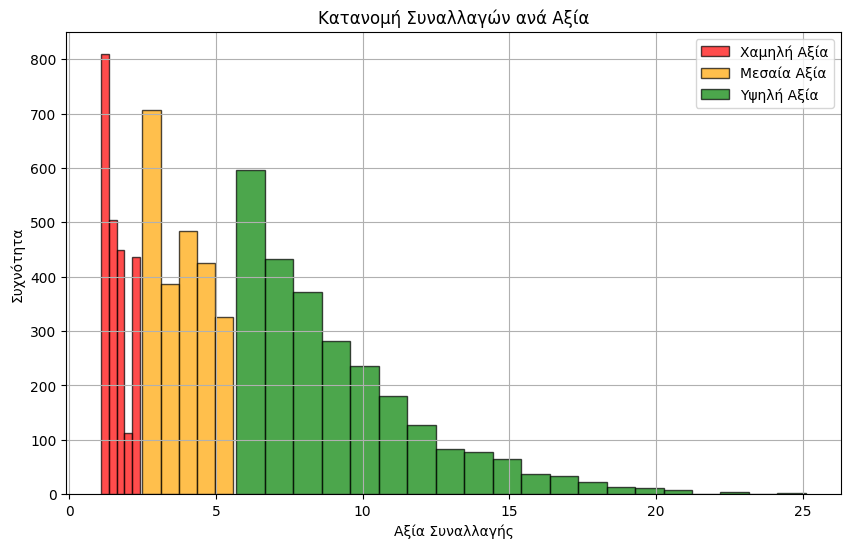

In [46]:
# @title Ιστόγραμμα κατανομής των συναλλαγών ανά διακριτή αξία

# Δημιουργία ιστογράμματος
plt.figure(figsize=(10, 6))
plt.hist(binary_df[binary_df['basket_category'] == 'low_value_basket']['basket_value'], bins=5, color='red', edgecolor='black', alpha=0.7, label='Χαμηλή Αξία')
plt.hist(binary_df[binary_df['basket_category'] == 'medium_value_basket']['basket_value'], bins=5, color='orange', edgecolor='black', alpha=0.7, label='Μεσαία Αξία')
plt.hist(binary_df[binary_df['basket_category'] == 'high_value_basket']['basket_value'], bins=20, color='green', edgecolor='black', alpha=0.7, label='Υψηλή Αξία')
plt.xlabel('Αξία Συναλλαγής')
plt.ylabel('Συχνότητα')
plt.title('Κατανομή Συναλλαγών ανά Αξία')
plt.legend()
plt.grid(True)
plt.show()

Στο παραπάνω ιστόγραμμα κάθε μπάρα αντιστοιχεί στον αριθμό των συναλλαγών που έχουν μια συγκεκριμένη αξία συναλλαγής. Το ύψος κάθε μπάρας αντιπροσωπεύει τη συχνότητα, δηλαδή πόσες φορές εμφανίζεται κάθε αξία συναλλαγής στο σύνολο δεδομένων.

Με βάση το παραπάνω γράφημα, φαίνεται ότι οι περισσότεροι πελάτες κάνουν αγορές αξίας κοντά στη μέση τιμή (5.04). Παρατηρώ επίσης ότι στην κατηγορία της μεσαίας αξίας η συχνότητα των συναλλαγών ανά αξία είναι περίπου ίδια σε όλο το εύρος τιμών. Τέλος, στο γράφημα φαίνεται ότι στην κατηγορία της υψηλής αξίας η συχνότητα των συναλλαγών ανά αξία είναι φθινουσα, που σημαίνει ότι όσο αυξάνεται η αξία μιας συναλλαγής τόσο μειώνεται και το πλήθος των πελατών που κάνουν αγορές της αντίστοιχης αξίας.

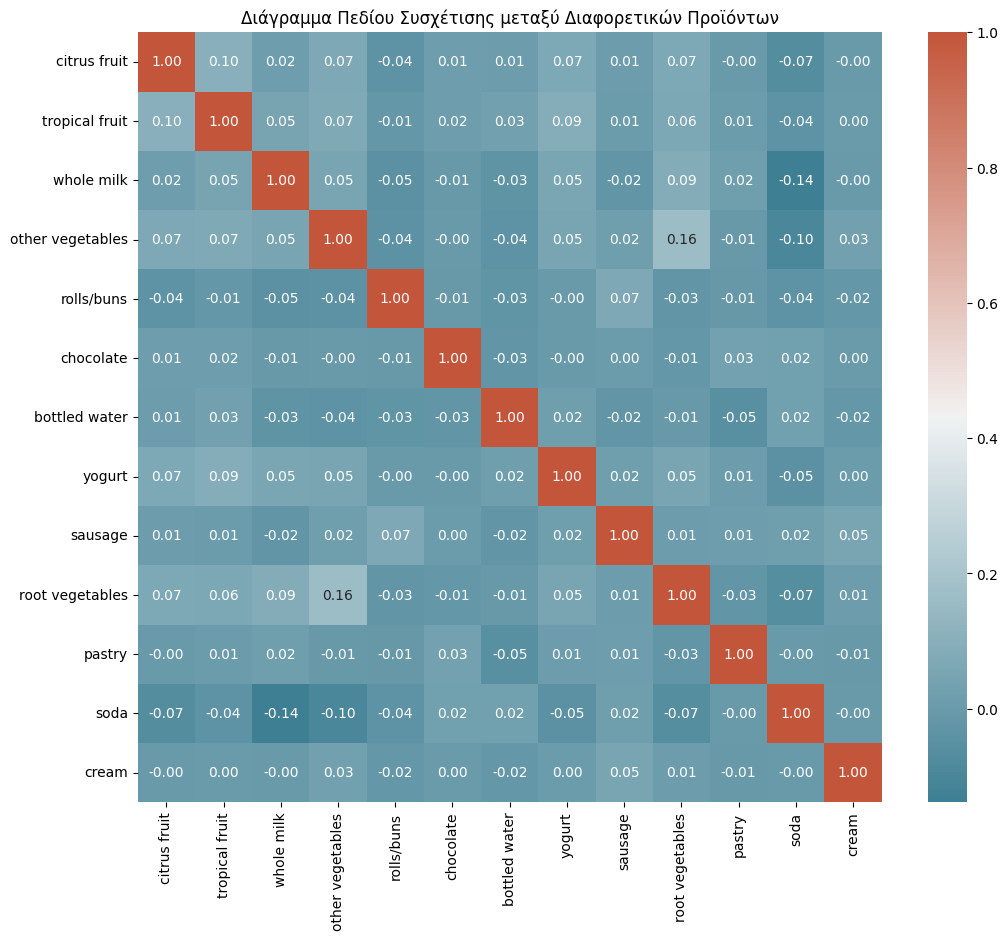

In [47]:
# @title Διάγραμμα πεδίου συσχέτισης

import seaborn as sns

# Υπολογισμός πινάκων συσχέτισης
correlation_matrix = binary_df.drop(['id', 'basket_value', 'basket_category', 'recency_days'], axis=1).corr()

# Δημιουργία της παλέτας χρωμάτων
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Δημιουργία διαγράμματος πεδίου συσχέτισης
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Διάγραμμα Πεδίου Συσχέτισης μεταξύ Διαφορετικών Προϊόντων')
plt.show()

Από το διάγραμμα συσχέτισης παρατηρώ ότι γενικά δεν υπάρχουν μεγάλες συσχετίσεις μεταξύ των προϊόντων. Η πιο δυνατή συσχέτιση ισούται με 0.16 και αφορά τα προϊόντα root vegetables και other vegetables. Μια άλλη συχέτιση, λίγο πιο κάτω από την πιο δυνατή, είναι μεταξύ tropical fruit και citrus fruit, και ισούται με 0.10. Επίσης υπάρχουν και πολλές αρκετά ασύναμες συσχετίσεις, με την πιο αδύναμη να ισούται με -0.14 που αφορά τα soda και whole milk.

Σύνολο Προϊόντων: 15617
Χαμηλής Αξίας Προϊόντα: 2367
Μεσαίας Αξίας Προϊόντα: 4856
Υψηλής Αξίας Προϊόντα: 8394


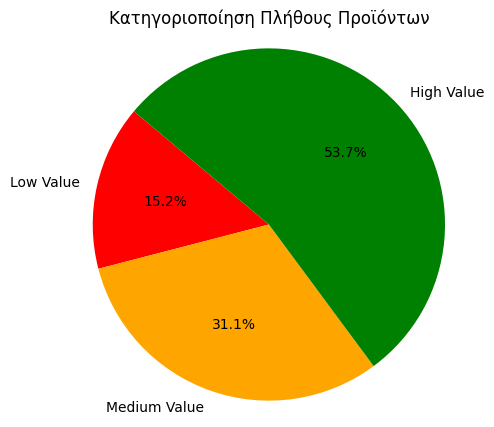

In [48]:
# @title Διάγραμμα πίτας ποσοστού πλήθους προϊότων ανά κατηγορία αξίας

# Υπολογισμός συνολικού αριθμού προϊόντων
total_products = binary_df.iloc[:, 3:16].sum().sum()

# Υπολογισμός πλήθους προϊόντων ανά κατηγορία αξίας συναλλαγής
low_value_products = binary_df[binary_df['basket_category'] == 'low_value_basket'].iloc[:, 3:16].sum().sum()
medium_value_products = binary_df[binary_df['basket_category'] == 'medium_value_basket'].iloc[:, 3:16].sum().sum()
high_value_products = binary_df[binary_df['basket_category'] == 'high_value_basket'].iloc[:, 3:16].sum().sum()

# Υπολογισμός ποσοστού προϊόντων ανά κατηγορία αξίας συναλλαγής
low_value_percentage = (low_value_products / total_products) * 100
medium_value_percentage = (medium_value_products / total_products) * 100
high_value_percentage = (high_value_products / total_products) * 100

# Εκτύπωση αποτελεσμάτων
print("Σύνολο Προϊόντων:", total_products)
print("Χαμηλής Αξίας Προϊόντα:", low_value_products)
print("Μεσαίας Αξίας Προϊόντα:", medium_value_products)
print("Υψηλής Αξίας Προϊόντα:", high_value_products)

# Δημιουργία λίστας με τα ποσοστά
percentages = [low_value_percentage, medium_value_percentage, high_value_percentage]

# Ονόματα των κατηγοριών
categories = ['Low Value', 'Medium Value', 'High Value']

# Δημιουργία διαγράμματος πίτας
plt.figure(figsize=(5, 5))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', colors=['red', 'orange', 'green'], startangle=140)
plt.title('Κατηγοριοποίηση Πλήθους Προϊόντων')
plt.axis('equal')  # Εξισορρόπηση του διαγράμματος πίτας
plt.show()

Στην παραπάνω πίτα βλέπουμε τι ποσοστό των συνολικών προϊόντων ανήκει στην εκάστοτε κατηγορία αξίας συναλλαγής (low, medium, high). Φαίνεται λοιπόν ότι οι συναλλαγές υψηλής αξίας έχουν το μεγαλύτερο ποσοστό προϊόντων συνολικά σε όλες τις συναλλαγές, ενώ οι συναλλαγές χαμηλής αξίας το χαμηλότερο.

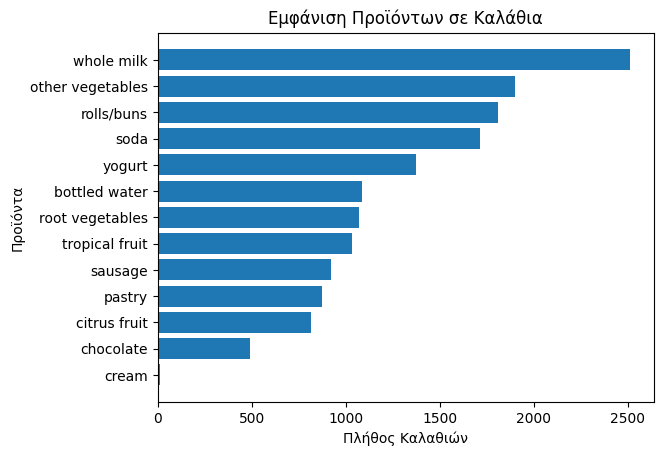

In [49]:
# @title Συχνότητα εμφάνισης προϊόντων σε καλάθια

# Προϊόντα
items = binary_df.drop(columns=['id', 'basket_value', 'recency_days', 'basket_category']).columns

# Το πλήθος των καλαθιών που εμφανίζεται κάθε προϊόν
basket_counts = binary_df.drop(columns=['id', 'basket_value', 'recency_days', 'basket_category']).sum()

# Ταξινόμηση των προϊόντων με βάση τη συχνότητα εμφάνισής τους στα καλάθια
sorted_indices = basket_counts.argsort()
sorted_items = items[sorted_indices]
sorted_basket_counts = basket_counts.values[sorted_indices]

# Δημιουργία του ιστογράμματος
plt.barh(sorted_items, sorted_basket_counts)
plt.xlabel('Πλήθος Καλαθιών')
plt.ylabel('Προϊόντα')
plt.title('Εμφάνιση Προϊόντων σε Καλάθια')
plt.show()

Στο παραπάνω ιστόγραμμα μπορούμε να δούμε πόσο συχνά επιλέγεται το κάθε προϊόν από τους πελάτες. Τα δημοφιλέστερα προϊόντα φαίνεται να είναι τα whole milk, other vegetables και rolls/buns. Επίσης φαίνεται ότι το cream είναι το προϊόν που έχει αγοραστεί τις λιγότερες φορές, ενώ τα chocolate και citrus fruit είναι τα αμέσως προηγούμενα λιγότερο δημοφιλή προϊόντα.

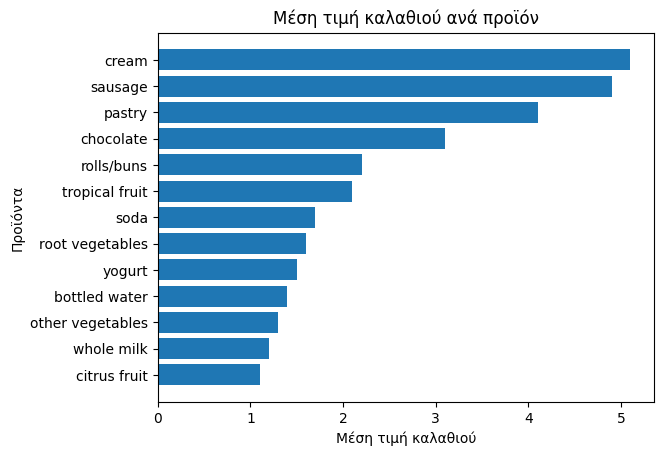

In [50]:
# @title Μέση τιμή καλαθιού ανά προϊόν

# Έλεγχος αν σε κάθε γραμμή του dataset οι μόνες στήλες με τιμή είναι οι πρώτες 4
def is_valid_row(row):
    return row.iloc[:4].count() == 4 and row.iloc[4:].isna().all()

filtered_data = dataset[dataset.apply(is_valid_row, axis=1)]

# Διατήρηση συναλλαγών που έχουν τιμή μια από τις desired_products
filtered_data = filtered_data[filtered_data['Item_1'].isin(desired_products)]

# Ομαδοποίηση δεδομένων ανά προϊόν και υπολογισμός μέσου όρου basket_value
grouped_data = filtered_data.groupby('Item_1')['basket_value'].mean().reset_index()

# Δημιουργία ιστογράμματος
grouped_data_sorted = grouped_data.sort_values(by='basket_value')
plt.barh(grouped_data_sorted['Item_1'], grouped_data_sorted['basket_value'])
plt.xlabel('Μέση τιμή καλαθιού')
plt.ylabel('Προϊόντα')
plt.title('Μέση τιμή καλαθιού ανά προϊόν')
plt.show()

Για τη δημιουργία του παραπάνω ιστογράμματος διατήρησα από τα αρχικά δεδομένα τις συναλλαγές που είχαν μόνο ένα προϊόν στο καλάθι το οποίο ταυτόχρονα ανήκει σε ένα από τα 13 που ενδιαφέρουν την ομάδα μάρκετινγκ, και στη συνέχεια υπολόγισα τη μέση τιμή καλαθιού για καθένα από αυτά. Ως αποτέλεσμα, από το ιστόγραμμα μπορούμε να αποκτήσουμε μια εικόνα για το πόσο ακιβό είναι το κάθε προϊόν. Βλέπουμε έτσι ότι τα cream, sausage και pastry είναι τα 3 πιο ακριβά και τα citrus fruit, whole milk και other vegetables τα 3 φθηνότερα.

# Άσκηση 2

Παρακάτω δημιουργώ μία συνάρτηση για τους σκοπούς του ερωτήματος α.

In [51]:
# @title Συνάρτηση συχνότερων συνόλων με την μέθοδο Apriori για συγκεκριμένο support

from mlxtend.frequent_patterns import apriori

def min_support_apriori(df, min_sup):
  # Εφαρμογή του αλγορίθμου Apriori
  frequent_itemsets = apriori(df.drop(columns=['id', 'basket_value', 'recency_days', 'basket_category']).astype(bool),
                              min_support=min_sup,
                              use_colnames=True)

  # Φιλτράρισμα των αποτελεσμάτων με μήκος τουλάχιστον 2
  filtered_frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x)) >= 2]

  # Υπολογισμός του μέγεθος του μεγαλύτερου itemset
  max_itemset_size = filtered_frequent_itemsets['itemsets'].apply(lambda x: len(x)).max()

  # Εκτύπωση αποτελεσμάτων
  print(f"Για min_support = {min_sup} βρέθηκαν {len(filtered_frequent_itemsets)} itemsets.")
  print("Το μήκος του μεγαλύτερου itemset είναι:", max_itemset_size)
  print(filtered_frequent_itemsets.to_string())

  return frequent_itemsets

Επειδή στο διάγραμμα πεδίου συσχέτισης στην προηγούμενη άσκηση τα νούμερα ήταν αρκετά χαμηλά, θα αρχίσω και εδώ από χαμηλές τιμές για το ελάχιστο support.

In [52]:
# @title Πείραμα 1 (0.2)

frequent_itemsets = min_support_apriori(binary_df, 0.2)

Για min_support = 0.2 βρέθηκαν 0 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: nan
Empty DataFrame
Columns: [support, itemsets]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Εφόσον δεν βρέθηκαν σύνολα πρέπει να κατεβάσω κι άλλο την τιμή.

In [53]:
# @title Πείραμα 2 (0.1)

frequent_itemsets = min_support_apriori(binary_df, 0.1)

Για min_support = 0.1 βρέθηκαν 1 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 2
    support                        itemsets
11  0.10184  (other vegetables, whole milk)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Αυτή η τιμή μου δίνει μόνο ένα σύνολο και συνεπώς πρέπει να τη μειώσω κι άλλο.

In [54]:
# @title Πείραμα 3 (0.09)

frequent_itemsets = min_support_apriori(binary_df, 0.09)

Για min_support = 0.09 βρέθηκαν 1 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 2
    support                        itemsets
11  0.10184  (other vegetables, whole milk)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Γιa min_support = 0.09 ο αλγόριθμος επιστρέφει ακριβώς δύο σύνολα. Θα δοκιμάσω να μειώσω κι άλλο την τιμή του support για να έχω περισσότερα σύνολα.

In [55]:
# @title Πείραμα 4 (0.08)

frequent_itemsets = min_support_apriori(binary_df, 0.08)

Για min_support = 0.08 βρέθηκαν 1 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 2
    support                        itemsets
11  0.10184  (other vegetables, whole milk)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Μειώνοντας κατά 0.01 την τιμή του support παίρνω ξανά 1 σύνολο. Στα επόμενα πειράματα θα συνεχίσω να μειώνω την τιμή του support κατά 0.01 μέχρι να μου επιστρέψει ο αλγόριθμος παραπάνω σύνολα.

In [56]:
# @title Πείραμα 5 (0.07)

frequent_itemsets = min_support_apriori(binary_df, 0.07)

Για min_support = 0.07 βρέθηκαν 3 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 2
     support                        itemsets
11  0.101840  (other vegetables, whole milk)
12  0.077072        (rolls/buns, whole milk)
13  0.076242            (yogurt, whole milk)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ήδη για 0.07 έχω παραπάνω σύνολα, αλλά όλοι είναι μήκους 2. Συνεπώς θα δοκιμάσω άκομα πιο μικρές τιμές για να βρω περισσότερους ή/και μεγαλύτερου μήκους σύνολα.

In [57]:
# @title Πείραμα 6 (0.06)

frequent_itemsets = min_support_apriori(binary_df, 0.06)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Για min_support = 0.06 βρέθηκαν 5 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 2
     support                             itemsets
12  0.101840       (other vegetables, whole milk)
13  0.077072             (rolls/buns, whole milk)
14  0.076242                 (yogurt, whole milk)
15  0.066556        (root vegetables, whole milk)
16  0.064480  (root vegetables, other vegetables)


In [58]:
# @title Πείραμα 7 (0.05)

frequent_itemsets = min_support_apriori(binary_df, 0.05)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Για min_support = 0.05 βρέθηκαν 10 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 2
     support                             itemsets
12  0.057562         (tropical fruit, whole milk)
13  0.101840       (other vegetables, whole milk)
14  0.077072             (rolls/buns, whole milk)
15  0.076242                 (yogurt, whole milk)
16  0.066556        (root vegetables, whole milk)
17  0.054518                   (soda, whole milk)
18  0.057977       (other vegetables, rolls/buns)
19  0.059084           (other vegetables, yogurt)
20  0.064480  (root vegetables, other vegetables)
21  0.052165                   (soda, rolls/buns)


In [59]:
# @title Πείραμα 8 (0.04)

frequent_itemsets = min_support_apriori(binary_df, 0.04)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Για min_support = 0.04 βρέθηκαν 18 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 2
     support                             itemsets
12  0.041511           (citrus fruit, whole milk)
13  0.057562         (tropical fruit, whole milk)
14  0.048845   (other vegetables, tropical fruit)
15  0.101840       (other vegetables, whole milk)
16  0.077072             (rolls/buns, whole milk)
17  0.046769          (bottled water, whole milk)
18  0.076242                 (yogurt, whole milk)
19  0.040681                (sausage, whole milk)
20  0.066556        (root vegetables, whole milk)
21  0.045247                 (pastry, whole milk)
22  0.054518                   (soda, whole milk)
23  0.057977       (other vegetables, rolls/buns)
24  0.059084           (other vegetables, yogurt)
25  0.064480  (root vegetables, other vegetables)
26  0.044555             (soda, other vegetables)
27  0.046769                 (yogurt, rolls/buns)
28  0.041649                (sausage, rolls/buns)
29  0.052165 

In [60]:
# @title Πείραμα 9 (0.03)

frequent_itemsets = min_support_apriori(binary_df, 0.03)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Για min_support = 0.03 βρέθηκαν 33 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 3
     support                                         itemsets
12  0.041511                       (citrus fruit, whole milk)
13  0.039297                 (other vegetables, citrus fruit)
14  0.057562                     (tropical fruit, whole milk)
15  0.048845               (other vegetables, tropical fruit)
16  0.033486                     (tropical fruit, rolls/buns)
17  0.039851                         (tropical fruit, yogurt)
18  0.101840                   (other vegetables, whole milk)
19  0.077072                         (rolls/buns, whole milk)
20  0.046769                      (bottled water, whole milk)
21  0.076242                             (yogurt, whole milk)
22  0.040681                            (sausage, whole milk)
23  0.066556                    (root vegetables, whole milk)
24  0.045247                             (pastry, whole milk)
25  0.054518                               (s

Για min_support = 0.03 έχω για πρώτη φορά και ένα σύνολο μήκους 3, ενώ το πλήθος των συνόλων έχει φτάσει πλέον στο 30.

In [61]:
# @title Πείραμα 10 (0.02)

frequent_itemsets = min_support_apriori(binary_df, 0.02)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Για min_support = 0.02 βρέθηκαν 52 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 3
     support                                         itemsets
12  0.027121                   (tropical fruit, citrus fruit)
13  0.041511                       (citrus fruit, whole milk)
14  0.039297                 (other vegetables, citrus fruit)
15  0.022831                       (citrus fruit, rolls/buns)
16  0.029473                           (yogurt, citrus fruit)
17  0.024076                  (root vegetables, citrus fruit)
18  0.057562                     (tropical fruit, whole milk)
19  0.048845               (other vegetables, tropical fruit)
20  0.033486                     (tropical fruit, rolls/buns)
21  0.025183                  (tropical fruit, bottled water)
22  0.039851                         (tropical fruit, yogurt)
23  0.028643                (root vegetables, tropical fruit)
24  0.028366                           (soda, tropical fruit)
25  0.101840                   (other vegetab

Έχω φτάσει πλέον στα 52 σύνολα, ενώ επίσης στα αποτελέσματα τώρα υπάρχουν περισσότερα σύνολα μήκους 3.

In [62]:
# @title Πείραμα 11 (0.01)

frequent_itemsets = min_support_apriori(binary_df, 0.01)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Για min_support = 0.01 βρέθηκαν 116 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 4
      support                                                 itemsets
12   0.027121                           (tropical fruit, citrus fruit)
13   0.041511                               (citrus fruit, whole milk)
14   0.039297                         (other vegetables, citrus fruit)
15   0.022831                               (citrus fruit, rolls/buns)
16   0.018403                            (bottled water, citrus fruit)
17   0.029473                                   (yogurt, citrus fruit)
18   0.015359                                  (sausage, citrus fruit)
19   0.024076                          (root vegetables, citrus fruit)
20   0.013284                                   (pastry, citrus fruit)
21   0.017435                                     (soda, citrus fruit)
22   0.057562                             (tropical fruit, whole milk)
23   0.048845                       (other vegetables, tropi

Για min_support = 0.01 βρέθηκαν 116 σύνολα, ενώ το μέγεθος του μεγαλύτερου itemset ισούται με 4. Θεωρώ ότι δεν έχει νόημα να μειώσω κι άλλο το support σε αυτό το σημείο, γιατί ήδη το πλήθος των συνόλων είναι αρκετά μεγάλο και η τιμή του min_support αρκετά μικρή.

In [63]:
# @title Τοπ 20 κανόνες με το υψηλότερο confidence αποκλειστικά για τα προϊόντα

from mlxtend.frequent_patterns import association_rules

# Υπολογισμός των κανόνων συσχέτισης
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)

# Ταξινόμηση των κανόνων με βάση το confidence και επιλογή των 20 κορυφαίων
top_20_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(20)

# Εκτύπωση των 20 καλύτερων κανόνων
print(top_20_confidence_rules.to_string())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                     antecedents         consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
436   (other vegetables, tropical fruit, yogurt)        (whole milk)            0.016743            0.347724  0.010378    0.619835  1.782549  0.004556    1.715770       0.446481
450  (root vegetables, other vegetables, yogurt)        (whole milk)            0.017573            0.347724  0.010654    0.606299  1.743623  0.004544    1.656782       0.434110
161              (root vegetables, citrus fruit)  (other vegetables)            0.024076            0.263318  0.014114    0.586207  2.226231  0.007774    1.780315       0.564399
215            (root vegetables, tropical fruit)  (other vegetables)            0.028643            0.263318  0.016743    0.584541  2.219904  0.009201    1.773176       0.565734
190            (root vegetables, tropical fruit)        (whole milk)            0.028643            0.347724  

Παρατηρώ ότι και στους 20 κανόνες στο δεξί μέλος τους κυριαρχεί το whole milk με εξαίρεση 7 από αυτούς που έχουν το other vegetables. Αυτό υποδηλώνει ότι η αγορά αυτών των δύο προϊόντων είναι συνήθως μια συμπληρωματική αγορά με άλλα προϊόντα. Παρατηρώ επίσης ότι στις 6 από τις 7 περιπτώσεις που έχουμε other vegetables στο δεξί μέλος του κανόνα, στο αριστερό υπάρχει το root vegetables που σημαίνει ότι σε πολλές περιπτώσεις που κάποιος θα αγοράσει root vegetables, θα προσθέσει στο καλάθι του και other vegetables.

Όπως φαίνεται και στο γράφημα [Συχνότητα εμφάνισης προϊόντων σε καλάθια](#συχνότητα-εμφάνισης-προϊόντων-σε-καλάθια), τα 2 προϊόντα που εμφανίζονται στο δεξί μέλος των κανόνων, είναι αυτά που έχουν και τη μεγαλύτερη συχνότητα εμφάνισης στα καλάθια, οπότε τα αποτελέσματα που βρήκα παραπάνω στους κανόνες είναι λογικά.

Σε αυτό το σημείο χρειάζεται να μετασχηματίσω τα δεδομένα μου σε δυαδική μορφή και για τη διακριτοποιημένη αξία καλαθιού έτσι ώστε να είναι σε κατάλληλη μορφή για τους αλγορίθμους κανόνων συσχέτισης.

In [64]:
# @title Μετασχηματισμός δεδομένων σε δυαδική μορφή για τη διακριτοποιημένη αξία καλαθιού

# Ορισμός διακριτοποιημένης αξίας καλαθιού
values = ['low_value_basket', 'medium_value_basket', 'high_value_basket']

# Δημιουργία δυαδικής μορφής
for value in values:
  binary_df[value] = binary_df['basket_category'].apply(lambda x: 1 if x == value else 0)

# Εμφάνιση 5 πρώτων στοιχείων του νέου DataFrame για έλεγχο
print(binary_df.head().to_string())

   id  basket_value  recency_days  citrus fruit  tropical fruit  whole milk  other vegetables  rolls/buns  chocolate  bottled water  yogurt  sausage  root vegetables  pastry  soda  cream      basket_category  low_value_basket  medium_value_basket  high_value_basket
0   1           1.1             2             1               0           0                 0           0          0              0       0        0                0       0     0      0     low_value_basket                 1                    0                  0
1   2           3.6            31             0               1           0                 0           0          0              0       1        0                0       0     0      0  medium_value_basket                 0                    1                  0
2   3           1.2             7             0               0           1                 0           0          0              0       0        0                0       0     0      0     low_value_b

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Στη συνέχεια θα βρω τα συχνότερα σύνολα συμπεριλαμβανομένης της διακριτοποιημένης αξίας καλαθιού με χρήση της συνάρτησης που δημιούργησα πιο πάνω και για min_support = 0.01.

In [65]:
# @title Συχνότερα σύνολα για για τα προϊόντα και την διακριτοποιημένη αξία καλαθιού

frequent_itemsets = min_support_apriori(binary_df, 0.01)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Για min_support = 0.01 βρέθηκαν 273 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 5
      support                                                                   itemsets
15   0.027121                                             (tropical fruit, citrus fruit)
16   0.041511                                                 (citrus fruit, whole milk)
17   0.039297                                           (other vegetables, citrus fruit)
18   0.022831                                                 (citrus fruit, rolls/buns)
19   0.018403                                              (bottled water, citrus fruit)
20   0.029473                                                     (yogurt, citrus fruit)
21   0.015359                                                    (sausage, citrus fruit)
22   0.024076                                            (root vegetables, citrus fruit)
23   0.013284                                                     (pastry, citrus fruit)
24   0.017435         

Βλέπω ότι με αυτή την αλλαγή στα δεδομένα δημιουργήθηκαν παραπάνω από τους διπλάσιους κανόνες σε σχέση με πριν, κάτι που όμως ήταν αναμενόμενο εφόσον προστέθηκαν άλλα 3 items τα οποία συμμετέχουν σε όλα καλάθια με περίπου ίδια συχνότητα.

In [66]:
# @title Τοπ 20 κανόνες με το υψηλότερο confidence αποκλειστικά για τα προϊόντα και την διακριτοποιημένη αξία καλαθιού

# Υπολογισμός των κανόνων συσχέτισης
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)

# Ταξινόμηση των κανόνων με βάση το confidence και επιλογή των 20 κορυφαίων
top_20_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(20)

# Εκτύπωση των 20 καλύτερων κανόνων
print(top_20_confidence_rules.to_string())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                 antecedents          consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
1365                        (pastry, whole milk, rolls/buns)  (high_value_basket)            0.011623            0.357963  0.011623         1.0  2.793583  0.007462         inf       0.649587
912                                        (sausage, yogurt)  (high_value_basket)            0.026705            0.357963  0.026705         1.0  2.793583  0.017146         inf       0.659653
857                                      (chocolate, pastry)  (high_value_basket)            0.010931            0.357963  0.010931         1.0  2.793583  0.007018         inf       0.649133
1435                            (pastry, yogurt, whole milk)  (high_value_basket)            0.012453            0.357963  0.012453         1.0  2.793583  0.007995         inf       0.650133
947                                          

Σε αυτή την περίπτωση παρατηρώ ότι όλοι οι κανόνες έχουν στο δεξί μέλος τους το high_value_basket και confidence ίσο με 1, που σημαίνει ότι είναι πολύ ακριβείς. Κρίνοντας από τα frequent itemset που υπολόγισα όμως προηγουμένως, κάτι τέτοιο δεν μου κάνει εντύπωση γιατί και εκεί, σχεδόν όλα τα itemsets περιλάμβαναν το high_value_basket.

Σε 12 από τους 20 κανόνες υπάρχει το sausage το οποίο μάλιστα στο γράφημα [Μέση τιμή καλαθιού ανά προϊόν](#μέση-τιμή-καλαθιού-ανά-προϊόν) φαίνεται να είναι το 2ο ακριβότερο προϊόν. Αν και το cream είναι το ακριβότερο προϊόν σύμφωνα με το γράφημα, δεν εμφανίζεται σε κανέναν από τους 20 παραπάνω κανόνες. Ωστόσο, σύμφωνα με το γράφημα [Συχνότητα εμφάνισης προϊόντων σε καλάθια](#συχνότητα-εμφάνισης-προϊόντων-σε-καλάθια) είναι το  λιγότερο δημοφιλές προϊόν, άρα είναι λογικό να μην εμφανίζεται στους κανόνες γιατί θα είχε πολύ χαμηλό support.

Γενικότερα παρατηρώ ότι όλοι οι κανόνες που προέκυψαν έχουν στο αριστερό τους μέλος τουλάχιστον ένα από τα πιο ακριβά προϊόντα με βάση το γράφημα, οπότε είναι λογικό να ανεβάζουν την συνολική αξία του καλαθιού και να προκύπτει στο δεξί μέλος η τιμή high_value_basket.

# Άσκηση 3

In [67]:
# @title Ομαδοποίηση με 5-means

from sklearn.cluster import KMeans

# Επιλογή συνεχών χαρακτηριστικών
X = dataset[['basket_value', 'recency_days']]

# Εφαρμογή του αλγορίθμου k-means με 5 ομάδες
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# Πρόβλεψη των ομάδων για κάθε συναλλαγή
labels = kmeans.labels_

# Κέντρα ομάδων
centers = kmeans.cluster_centers_

# Πλήθος σημείων ανά ομάδα
cluster_counts = pd.Series(labels).value_counts().sort_index()

# Δημιουργία DataFrame με τις συντεταγμένες, τις ετικέτες και το πλήθος σημείων ανά ομάδα
cluster_df = pd.DataFrame(list(zip(centers)), columns=['Centers'])
cluster_df['Cluster'] = cluster_counts.index
cluster_df['Points'] = cluster_counts.values

# Εκτύπωση του DataFrame
print("\nCluster centers with points:")
print(cluster_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster centers with points:
                                    Centers  Cluster  Points
0    [4.682446264073695, 6.577789150460067]        0    1958
1  [2.9540807914262186, 54.152514427040586]        1    1213
2   [3.8689062500000038, 36.68281250000002]        2    1275
3    [5.421630094043888, 70.54179728317604]        3    1914
4   [8.420170212765953, 20.814468085106576]        4    1176


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


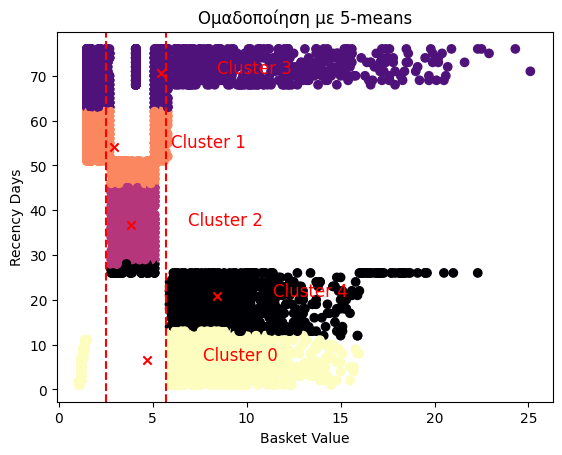

In [68]:
# @title Οπτικοποίηση ομάδων

# Προβολή των ομάδων
plt.scatter(X['basket_value'], X['recency_days'], c=labels, cmap='magma_r')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.xlabel('Basket Value')
plt.ylabel('Recency Days')
plt.title('Ομαδοποίηση με 5-means')

# Ορισμός των ετικετών για κάθε κέντρο ομάδας
cluster_labels = [f'Cluster {i}' for i in range(len(centers))]

# Προσθήκη των ετικετών στο γράφημα
for i, txt in enumerate(cluster_labels):
    plt.annotate(txt, (centers[i, 0] + 3 , centers[i, 1]), fontsize=12, color='red')

# Προσθήκη κάθετων γραμμών για τα όρια κατηγοριών αξίας καλαθιού
plt.axvline(x=2.5, color='r', linestyle='--')
plt.axvline(x=5.7, color='r', linestyle='--')

plt.show()

In [69]:
# @title Ανάλυση ομάδων που προέκυψαν

import numpy as np

# Υπολογισμός της μέσης τιμής των κέντρων
centers_mean = np.mean(centers, axis=0)

# Υπολογισμός της τυπικής απόκλισης των κέντρων
centers_std = np.std(centers, axis=0)

# Υπολογισμός της τυπικής απόκλισης ανά ομάδα
clusters_std = []
for i in range(5):
  clusters_std.append(np.std(X[labels==i], axis=0).values)

# Εκτύπωση των αποτελεσμάτων
print(f"Μέση τιμή των κέντρων των ομάδων: {centers_mean}\n")
print(f"Τυπική απόκλιση των κέντρων των ομάδων: {centers_std}\n")
print("Τυπική απόκλιση ανά ομάδα:")
for cluster_label, std in zip(cluster_labels, clusters_std):
  print(f"{cluster_label}: {std}")
print("\n")

# Ποσοστό συνόλου συναλλαγών ανά ομάδα
percentages_per_cluster = np.round(((cluster_counts.values / cluster_counts.sum()) * 100), 2)
print("Ποσοστό συνόλου συναλλαγών ανά ομάδα:")
for cluster_label, percentage in zip(cluster_labels, percentages_per_cluster):
  print(f"{cluster_label}: {percentage}%")
print("\n")

Μέση τιμή των κέντρων των ομάδων: [ 5.06944672 37.75387629]

Τυπική απόκλιση των κέντρων των ομάδων: [ 1.86639872 22.82105271]

Τυπική απόκλιση ανά ομάδα:
Cluster 0: [3.96288241 3.29526694]
Cluster 1: [1.27923756 4.82306775]
Cluster 2: [0.74555488 5.00688056]
Cluster 3: [4.27255491 3.615475  ]
Cluster 4: [3.39595857 4.49989298]


Ποσοστό συνόλου συναλλαγών ανά ομάδα:
Cluster 0: 25.98%
Cluster 1: 16.1%
Cluster 2: 16.92%
Cluster 3: 25.4%
Cluster 4: 15.61%




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Ομάδα 0:** Πολύ πρόσφατες (1-14) συναλλαγές υψηλής αξίας, αντιπροσωπεύει το 25.98% του συνόλου των συναλλαγών

**Ομάδα 1:** Παλιές συναλλαγές (46-63) χαμηλής και μεσαίας αξίας, αντιπροσωπεύει το 16.1% του συνόλου των συναλλαγών

**Ομάδα 2:** Συναλλαγές πριν από 30-45 ημέρες μεσαίας αξίας, αντιπροσωπεύει το 16.92% του συνόλου των συναλλαγών

**Ομάδα 3:** Πρώτες (64-75) συναλλαγές κυρίως υψηλής αξίας, αντιπροσωπεύει το 25.4% του συνόλου των συναλλαγών

**Ομάδα 4:** Συναλλαγές πριν από 15-25 ημέρες υψηλής αξίας, αντιπροσωπεύει το 15.61% του συνόλου των συναλλαγών


---


Παρατηρώ ότι τις πρώτες 10 μέρες γινόντουσαν πολλές συναλλαγές κυρίως υψηλής αξίς και δευτερευόντος χαμηλής αξίας. Ωστόσο τις τελευταίες περίπου 35 ημέρες οι συναλλαγές που έγιναν είναι στην πλειοψηφία τους υψηλής αξίας, με τη διαφορά ότι καλύπτουν μικρότερο εύρος τιμών σε σχέση με αυτές των πρώτων 10 ημερών και μάλιστα στο πρώτο μισό του εύρους (περίπου 5-15€).

Κάτι που ενδεχομένως θα μπορούσε να απασχολήσει την ομάδα μάρκετινγκ, είναι το γιατί στην ομάδα 2, δηλαδή στο διάστημα πριν από περίπου 30-45 ημέρες, οι συναλλαγές που πραγματοποιήθηκαν βρίσκονται αυστηρά στην κατηγορία της μεσαίας αξίας συναλλαγών.

In [70]:
# @title Μετασχηματισμός δεδομένων σε δυαδική μορφή για την ανάθεση στις ομάδες

# Δημιουργία DataFrame
binary_cluster_df = binary_df.copy()

# Δημιουργία δυαδικής μορφής
for cluster in cluster_labels:
  binary_cluster_df[cluster] = binary_df.apply(lambda row: 1 if labels[row.name] == int(cluster[-1]) else 0, axis=1)

# Εμφάνιση 5 πρώτων στοιχείων του νέου DataFrame για έλεγχο
print(binary_cluster_df.head().to_string())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   id  basket_value  recency_days  citrus fruit  tropical fruit  whole milk  other vegetables  rolls/buns  chocolate  bottled water  yogurt  sausage  root vegetables  pastry  soda  cream      basket_category  low_value_basket  medium_value_basket  high_value_basket  Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4
0   1           1.1             2             1               0           0                 0           0          0              0       0        0                0       0     0      0     low_value_basket                 1                    0                  0          1          0          0          0          0
1   2           3.6            31             0               1           0                 0           0          0              0       1        0                0       0     0      0  medium_value_basket                 0                    1                  0          0          0          1          0          0
2   3           1.2             7    

### Οπτικοποίηση δεδομένων

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


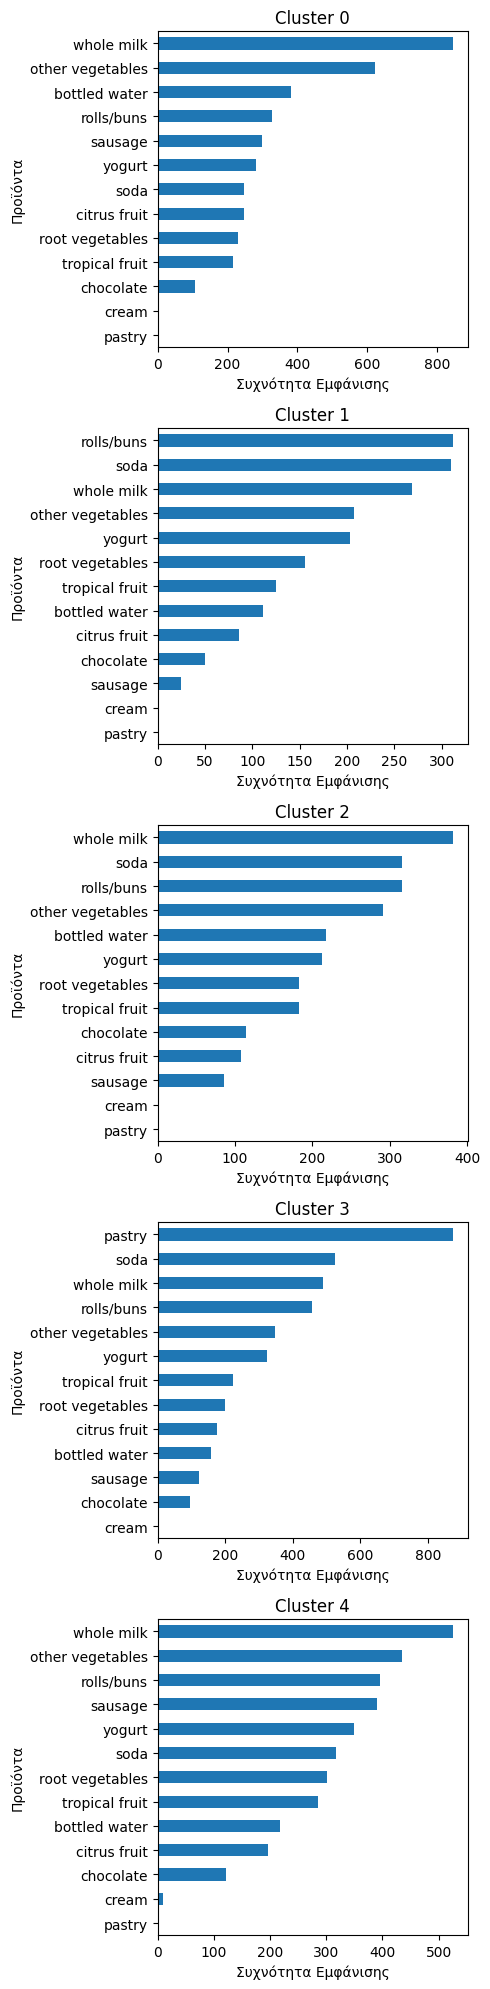

In [71]:
# @title Συχνότητα εμφάνισης προϊόντων στις ομάδες

# Υπολογισμός συχνοτήτων εμφάνισης προϊόντων ανά ομάδα
product_frequencies_per_cluster = {}

for cluster in cluster_labels:
  product_frequencies = binary_cluster_df[binary_cluster_df[cluster] == 1].iloc[:, 3:16].sum(axis=0).sort_values()
  product_frequencies_per_cluster[cluster[-1]] = product_frequencies

# Εμφάνιση γραφήματος
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(5, 20)) # Δημιουργία 5 υπογραφημάτων, ένα για κάθε ομάδα

for (cluster, product_frequencies), ax in zip(product_frequencies_per_cluster.items(), axes):
  product_frequencies.plot(kind='barh', ax=ax)
  ax.set_title(f'Cluster {cluster}')
  ax.set_xlabel('Συχνότητα Εμφάνισης')
  ax.set_ylabel('Προϊόντα')

plt.tight_layout()
plt.show()

Στα παραπάνω γραφήματα φαίνεται η συχνότητα εμφάνισης του κάθε προϊόντος στα καλάθια ανά ομάδα *(αυτές που προέκυψαν από τον αλγόριθμο K-means)*. Έτσι μπορούμε να δούμε τα δημοφιλέστερα και το λιγότερο δημοφιλή προϊόντα ανά ομάδα. Αξίζει να σημειωθεί ότι το pastry που στην ομάδα 3 είναι το δημοφιλέστερο προϊόν -και μάλιστα με διαφορά σε σχέση με τα επόμενα-, σε όλες τις υπόλοιπες είναι αυτό που επιλέγεται πιο σπάνια. Νωρίτερα είχα βρει ότι ειναι το 3ο πιο ακριβό προϊόν, οπότε συμπεραίνω ότι συμβάλλει σημαντικά στο γεγονός ότι η ομάδα 3 αποτελείται κυρίως από συναλλαγές υψηλής αξίας.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


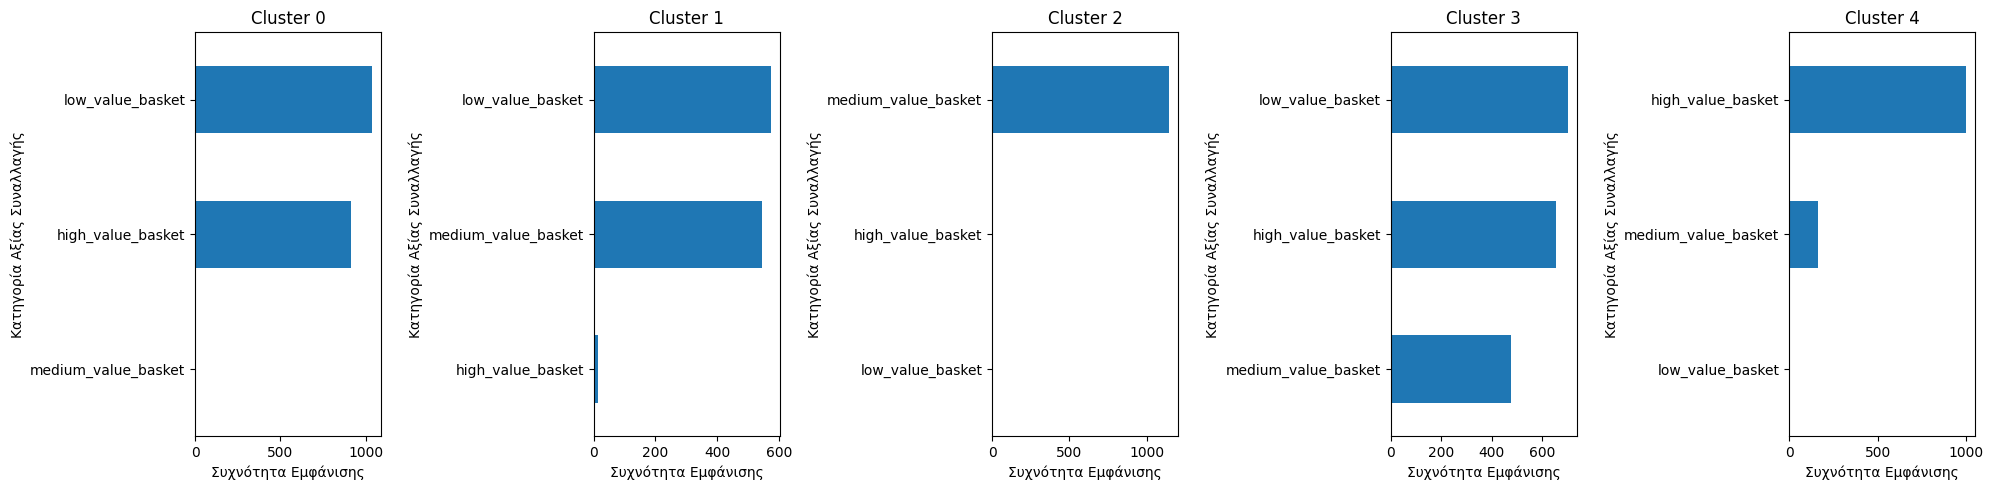

In [72]:
# @title Συχνότητα εμφάνισης κατηγοριών αξίας συναλλαγής ανά ομάδα

# Υπολογισμός συχνοτήτων εμφάνισης προϊόντων ανά ομάδα
basket_category_frequencies_per_cluster = {}

for cluster in cluster_labels:
  basket_category_frequencies = binary_cluster_df[binary_cluster_df[cluster] == 1].iloc[:, 17:20].sum(axis=0).sort_values()
  basket_category_frequencies_per_cluster[cluster[-1]] = basket_category_frequencies

# Εμφάνιση γραφήματος
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5)) # Δημιουργία 5 υπογραφημάτων, ένα για κάθε ομάδα

for (cluster, product_frequencies), ax in zip(basket_category_frequencies_per_cluster.items(), axes):
  product_frequencies.plot(kind='barh', ax=ax)
  ax.set_title(f'Cluster {cluster}')
  ax.set_xlabel('Συχνότητα Εμφάνισης')
  ax.set_ylabel('Κατηγορία Αξίας Συναλλαγής')

plt.tight_layout()
plt.show()

Στα παραπάνω γραφήματα βλέπουμε τις κατηγορίες αξίας συναλλαγής που επικρατούν σε κάθε ομάδα με κριτήριο την εμφάνισή τους στις συναλλαγές. Με βάση αυτά τα γραφήματα αλλάζουν κάποιες από τις εκτιμήσεις που είχα κάνει για τις ομάδες από το γράφημα της ομαδοποίησης. Προφανώς λόγω της αναπαράστασης εκεί δεν φαίνεται η πραγματική πυκνότητα των σημείων, οπότε κατέληξα σε λανθασμένα συμπεράσματα.

Συνεπώς οι ομάδες διαμορφώνονται ως εξής:

**Ομάδα 0:** Πολύ πρόσφατες (1-14) συναλλαγές κυρίως χαμηλής αλλά και υψηλής αξίας, αντιπροσωπεύει το 25.98% του συνόλου των συναλλαγών

**Ομάδα 1:** Παλιές (46-63) συναλλαγές μεσαίας και χαμηλής αξίας, αντιπροσωπεύει το 16.1% του συνόλου των συναλλαγών

**Ομάδα 2:** Συναλλαγές πριν από 30-45 ημέρες μεσαίας αξίας, αντιπροσωπεύει το 16.92% του συνόλου των συναλλαγών

**Ομάδα 3:** Πρώτες (64-75) συναλλαγές κυρίως χαμηλής και υψηλής αξίας, αντιπροσωπεύει το 25.4% του συνόλου των συναλλαγών

**Ομάδα 4:** Συναλλαγές πριν από 15-25 ημέρες υψηλής αξίας, αντιπροσωπεύει το 15.61% του συνόλου των συναλλαγών

---

Μετά από αυτές τις τροποποιήσεις, θα μπορούσαν ίσως να απασχολήσουν την ομάδα μάρκετινγκ και οι ομάδες 0 και 3 οι οποίες αντιπροσωπεύουν το μεγαλύτερο ποσοστό των συναλλαγών και αποτελούται κυρίως από συναλλαγές χαμηλής αξίας αλλά και υψηλής χωρίς μεγάλης διαφορά. Να εξετάσουν δηλαδή γιατί σε εκείνες τις περιόδους πραγματοποιήθηκαν τόσες συναλλαγές και γιατί η πλειοψηφία τους ήταν χαμηλής αξίας.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


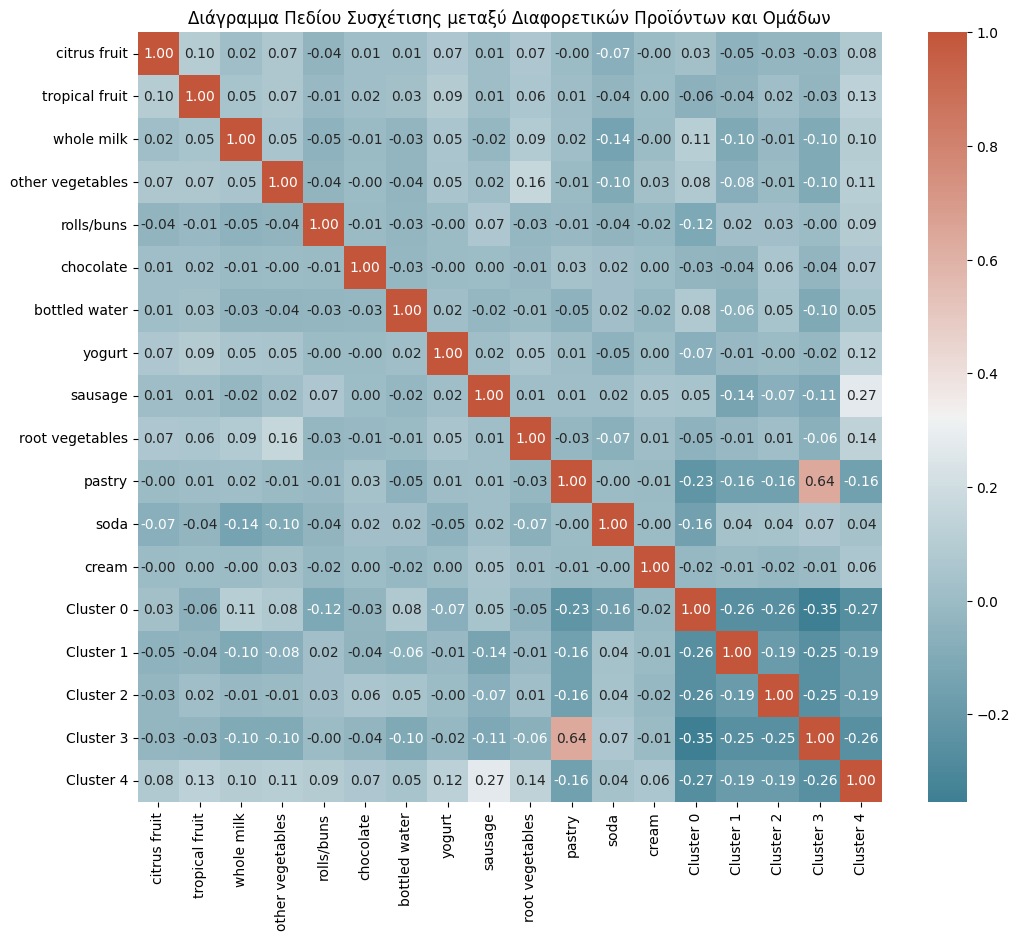

In [73]:
# @title Διάγραμμα πεδίου συσχέτισης

import seaborn as sns

# Υπολογισμός πινάκων συσχέτισης
correlation_matrix = binary_cluster_df.drop(['id', 'basket_value', 'basket_category', 'recency_days', 'low_value_basket', 'medium_value_basket', 'high_value_basket'], axis=1).corr()

# Δημιουργία της παλέτας χρωμάτων
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Δημιουργία διαγράμματος πεδίου συσχέτισης
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Διάγραμμα Πεδίου Συσχέτισης μεταξύ Διαφορετικών Προϊόντων και Ομάδων')
plt.show()

Και σε αυτό το διάγραμμα πεδίου συσχέτισης παρατηρώ ότι οι περισσότερες τιμές είναι χαμηλές. Ωστόσο υπάρχουν και κάποιες που είναι μεγαλύτερες συγκριτικά με το προηγούμενο. Για παράδειγμα παρατηρώ τη μεγαλύτερη συσχέτιση ανάμεσα σε pastry και Cluster 3 η οποία είναι ίση με 0.64, ενώ η δεύτερη μεγαλύτερη ισούται με 0.27 και είναι ανάμεσα στο sausage και Cluster 4.

# Άσκηση 4

### Κανόνες για τα προϊόντα και τις ομάδες των συναλλαγών

#### Συχνότερα σύνολα

Παρακάτω προσπαθώ και πάλι πειραματικά να βρω το ελάχιστο support για να δημιουργήσω τα συχνότερα σύνολα. Θα ξεκινήσω από το 0.1 και θα συνεχίσω ανάλογα με τα αποτελέσματα.

In [74]:
# @title Πείραμα 1 (0.1)

frequent_itemsets = min_support_apriori(binary_cluster_df.drop(columns=['low_value_basket', 'medium_value_basket', 'high_value_basket']), 0.1)

Για min_support = 0.1 βρέθηκαν 3 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 2
     support                        itemsets
16  0.101840  (other vegetables, whole milk)
17  0.117199         (Cluster 0, whole milk)
18  0.121074             (Cluster 3, pastry)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Τα σύνολα που έχουν προκύψει είναι πολύ λίγα οπότε θα μειώσω την τιμή του ελάχιστου support.

In [75]:
# @title Πείραμα 2 (0.09)

frequent_itemsets = min_support_apriori(binary_cluster_df.drop(columns=['low_value_basket', 'medium_value_basket', 'high_value_basket']), 0.09)

Για min_support = 0.09 βρέθηκαν 3 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 2
     support                        itemsets
16  0.101840  (other vegetables, whole milk)
17  0.117199         (Cluster 0, whole milk)
18  0.121074             (Cluster 3, pastry)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Τα σύνολα παραμένουν λίγα και επίσης όλα είναι μήκους 2, επομένως θα μειώνω την τιμή μέχρι να προκύψουν περισσότερα σύνολα και ιδανικά και μεγαλύτερου μήκους.

In [76]:
# @title Πείραμα 3 (0.08)

frequent_itemsets = min_support_apriori(binary_cluster_df.drop(columns=['low_value_basket', 'medium_value_basket', 'high_value_basket']), 0.08)

Για min_support = 0.08 βρέθηκαν 4 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 2
     support                        itemsets
16  0.101840  (other vegetables, whole milk)
17  0.117199         (Cluster 0, whole milk)
18  0.086343   (Cluster 0, other vegetables)
19  0.121074             (Cluster 3, pastry)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
# @title Πείραμα 4 (0.07)

frequent_itemsets = min_support_apriori(binary_cluster_df.drop(columns=['low_value_basket', 'medium_value_basket', 'high_value_basket']), 0.07)

Για min_support = 0.07 βρέθηκαν 8 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 2
     support                        itemsets
16  0.101840  (other vegetables, whole milk)
17  0.077072        (rolls/buns, whole milk)
18  0.076242            (yogurt, whole milk)
19  0.117199         (Cluster 0, whole milk)
20  0.072783         (Cluster 4, whole milk)
21  0.086343   (Cluster 0, other vegetables)
22  0.121074             (Cluster 3, pastry)
23  0.072506               (Cluster 3, soda)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
# @title Πείραμα 5 (0.06)

frequent_itemsets = min_support_apriori(binary_cluster_df.drop(columns=['low_value_basket', 'medium_value_basket', 'high_value_basket']), 0.06)

Για min_support = 0.06 βρέθηκαν 13 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 2
     support                             itemsets
17  0.101840       (other vegetables, whole milk)
18  0.077072             (rolls/buns, whole milk)
19  0.076242                 (yogurt, whole milk)
20  0.066556        (root vegetables, whole milk)
21  0.117199              (Cluster 0, whole milk)
22  0.067801              (Cluster 3, whole milk)
23  0.072783              (Cluster 4, whole milk)
24  0.064480  (root vegetables, other vegetables)
25  0.086343        (Cluster 0, other vegetables)
26  0.060191        (Cluster 4, other vegetables)
27  0.063235              (Cluster 3, rolls/buns)
28  0.121074                  (Cluster 3, pastry)
29  0.072506                    (Cluster 3, soda)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
# @title Πείραμα 6 (0.05)

frequent_itemsets = min_support_apriori(binary_cluster_df.drop(columns=['low_value_basket', 'medium_value_basket', 'high_value_basket']), 0.05)

Για min_support = 0.05 βρέθηκαν 22 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 2
     support                             itemsets
17  0.057562         (tropical fruit, whole milk)
18  0.101840       (other vegetables, whole milk)
19  0.077072             (rolls/buns, whole milk)
20  0.076242                 (yogurt, whole milk)
21  0.066556        (root vegetables, whole milk)
22  0.054518                   (soda, whole milk)
23  0.117199              (Cluster 0, whole milk)
24  0.052857              (Cluster 2, whole milk)
25  0.067801              (Cluster 3, whole milk)
26  0.072783              (Cluster 4, whole milk)
27  0.057977       (other vegetables, rolls/buns)
28  0.059084           (other vegetables, yogurt)
29  0.064480  (root vegetables, other vegetables)
30  0.086343        (Cluster 0, other vegetables)
31  0.060191        (Cluster 4, other vegetables)
32  0.052165                   (soda, rolls/buns)
33  0.063235              (Cluster 3, rolls/buns)
34  0.054795 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
# @title Πείραμα 7 (0.04)

frequent_itemsets = min_support_apriori(binary_cluster_df.drop(columns=['low_value_basket', 'medium_value_basket', 'high_value_basket']), 0.04)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Για min_support = 0.04 βρέθηκαν 43 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 3
     support                             itemsets
17  0.041511           (citrus fruit, whole milk)
18  0.057562         (tropical fruit, whole milk)
19  0.048845   (other vegetables, tropical fruit)
20  0.101840       (other vegetables, whole milk)
21  0.077072             (rolls/buns, whole milk)
22  0.046769          (bottled water, whole milk)
23  0.076242                 (yogurt, whole milk)
24  0.040681                (sausage, whole milk)
25  0.066556        (root vegetables, whole milk)
26  0.045247                 (pastry, whole milk)
27  0.054518                   (soda, whole milk)
28  0.117199              (Cluster 0, whole milk)
29  0.052857              (Cluster 2, whole milk)
30  0.067801              (Cluster 3, whole milk)
31  0.072783              (Cluster 4, whole milk)
32  0.057977       (other vegetables, rolls/buns)
33  0.059084           (other vegetables, yogurt)
34  0.064480 

Για 0.04 έχω για πρώτη φορά και σύνολα μήκους 3, αλλά στην άσκηση 2 το πλήθος των συνόλων στο οποίο είχα καταλήξει ήταν πολύ μεγαλύτερο όποτε θα συνεχίσω να κατεβάζω την τιμή για να δω πώς θα εξελιχθεί.

In [81]:
# @title Πείραμα 8 (0.03)

frequent_itemsets = min_support_apriori(binary_cluster_df.drop(columns=['low_value_basket', 'medium_value_basket', 'high_value_basket']), 0.03)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Για min_support = 0.03 βρέθηκαν 68 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 3
     support                                         itemsets
17  0.041511                       (citrus fruit, whole milk)
18  0.039297                 (other vegetables, citrus fruit)
19  0.034316                        (Cluster 0, citrus fruit)
20  0.057562                     (tropical fruit, whole milk)
21  0.048845               (other vegetables, tropical fruit)
22  0.033486                     (tropical fruit, rolls/buns)
23  0.039851                         (tropical fruit, yogurt)
24  0.030995                      (Cluster 3, tropical fruit)
25  0.039435                      (Cluster 4, tropical fruit)
26  0.101840                   (other vegetables, whole milk)
27  0.077072                         (rolls/buns, whole milk)
28  0.046769                      (bottled water, whole milk)
29  0.076242                             (yogurt, whole milk)
30  0.040681                            (saus

In [82]:
# @title Πείραμα 9 (0.02)

frequent_itemsets = min_support_apriori(binary_cluster_df.drop(columns=['low_value_basket', 'medium_value_basket', 'high_value_basket']), 0.02)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Για min_support = 0.02 βρέθηκαν 110 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 3
      support                                         itemsets
17   0.027121                   (tropical fruit, citrus fruit)
18   0.041511                       (citrus fruit, whole milk)
19   0.039297                 (other vegetables, citrus fruit)
20   0.022831                       (citrus fruit, rolls/buns)
21   0.029473                           (yogurt, citrus fruit)
22   0.024076                  (root vegetables, citrus fruit)
23   0.034316                        (Cluster 0, citrus fruit)
24   0.024353                        (Cluster 3, citrus fruit)
25   0.027259                        (Cluster 4, citrus fruit)
26   0.057562                     (tropical fruit, whole milk)
27   0.048845               (other vegetables, tropical fruit)
28   0.033486                     (tropical fruit, rolls/buns)
29   0.025183                  (tropical fruit, bottled water)
30   0.039851                 

Σε αυτό το σημείο έχω αρκετά σύνολα απλά θέλω να κάνω ακόμα ένα πείραμα για να δω αν μπορώ να έχω και σύνολα μεγαλύτερου μήκους.

In [83]:
# @title Πείραμα 10 (0.01)

frequent_itemsets = min_support_apriori(binary_cluster_df.drop(columns=['low_value_basket', 'medium_value_basket', 'high_value_basket']), 0.01)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Για min_support = 0.01 βρέθηκαν 255 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 4
      support                                                    itemsets
17   0.027121                              (tropical fruit, citrus fruit)
18   0.041511                                  (citrus fruit, whole milk)
19   0.039297                            (other vegetables, citrus fruit)
20   0.022831                                  (citrus fruit, rolls/buns)
21   0.018403                               (bottled water, citrus fruit)
22   0.029473                                      (yogurt, citrus fruit)
23   0.015359                                     (sausage, citrus fruit)
24   0.024076                             (root vegetables, citrus fruit)
25   0.013284                                      (pastry, citrus fruit)
26   0.017435                                        (soda, citrus fruit)
27   0.034316                                   (Cluster 0, citrus fruit)
28   0.011900           

Για ελάχιστο support ίσο με 0.01 έχω τώρα πολλά παραπάνω σύνολα (255), αλλά έχω και σύνολα μήκους 4 οπότε θα κρατήσω αυτή την τιμή για τους κανόνες συσχέτισης.

#### Κανόνες συσχέτισης

Θα υπολογίσω τώρα τους 20 κανόνες με το υψηλότερο confidence αποκλειστικά για τα προϊόντα και τις ομάδες των συναλλαγών για ελάχιστο support ίσο με 0.01.

In [84]:
# @title Κανόνες συσχέτισης

# Υπολογισμός των κανόνων συσχέτισης
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)

# Ταξινόμηση των κανόνων με βάση το confidence και επιλογή των 20 κορυφαίων
top_20_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(20)

# Εκτύπωση των 20 καλύτερων κανόνων
print(top_20_confidence_rules.to_string())

                                 antecedents  consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
1091        (pastry, whole milk, rolls/buns)  (Cluster 3)            0.011623            0.253494  0.011623    1.000000  3.944869  0.008677         inf       0.755285
221                                 (pastry)  (Cluster 3)            0.121074            0.253494  0.121074    1.000000  3.944869  0.090382         inf       0.849339
306                   (pastry, citrus fruit)  (Cluster 3)            0.013284            0.253494  0.013284    1.000000  3.944869  0.009916         inf       0.756556
936                  (pastry, bottled water)  (Cluster 3)            0.012177            0.253494  0.012177    1.000000  3.944869  0.009090         inf       0.755708
828               (other vegetables, pastry)  (Cluster 3)            0.030718            0.253494  0.030718    1.000000  3.944869  0.022931         inf       0.77016

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Από τους κανόνες που προέκυψαν παρατηρώ αρχικά ότι όλοι έχουν πολύ υψηλό confidence (μάλιστα οι 17 πρώτοι έχουν τιμή ίση με 1), πράγμα που υποδηλώνει ότι αυτοί οι κανόνες είναι πολύ ακριβείς και επαληθεύονται στα δεδομένα συχνά. Από τους 20 κανόνες, οι 16 από αυτούς έχουν το Cluster 3 στο δεξί μέρος τους, ενώ οι υπόλοιποι έχουν το pastry. Παρατηρώ επίσης ότι οι 4 αυτοί κανόνες που δεν έχουν το Cluster 3 σαν συνέπεια, το έχουν σαν προϋπόθεση.

Γενικότερα από τους κανόνες φαίνεται ότι υπάρχει πολύ υψηλή συσχέτιση ανάμεσα στο pastry και το Cluster 3, κάτι που φαινόταν και στο αντίστοιχο διάγραμμα [Συχνότητα εμφάνισης προϊόντων στις ομάδες](#συχνότητα-εμφάνισης-προϊόντων-στις-ομάδες), που έδειχνε ότι το pastry είναι το προϊόν με την μεγαλύτερη συχνότητα εμφάνισης στην συγκεκριμένη ομάδα. Παρατηρώ επίσης ότι συχνά συνδυάζεται το pastry με το whole milk (το οποίο είναι 3ο στη συχνότητα εμφάνισης για την ομάδα 3).

Το γεγονός ότι το pastry εμφανίζει τόσο υψηλή συσχέτιση με το Cluster 3 και σε συνδυασμό με το ότι στις υπόλοιπες ομάδες είναι το προϊόν με τη χαμηλότερη συχνότητα (φαίνεται από τα γραφήματα νωρίτερα), υποδηλώνει ότι μπορεί εκείνες τις ημέρες να ήταν σε έκπτωση ή σε κάποια προσφορά. Να σημειωθεί επίσης ότι όπως προέκυψε νωρίτερα σε αναλύσεις της άσκησης 1, είναι ένα προϊόν από τα ακριβά και ταυτόχρονα από τα λιγότερο δημοφιλή. Μπορεί δηλαδή να αποφεύγεται λόγω της τιμής του και επειδή ακριβώς ήταν σε προσφορά εκείνη την περίοδο να ανέβηκαν οι πωλήσεις του.

Οι ομάδες 0 και 2 που είχα πει ότι θα μπορούσαν να απασχολήσουν την ομάδα του μάρκετινγκ, δεν εμφανίζονται σε κανέναν από τους τοπ 20 κανόνες συσχέτισης που προέκυψαν.

### Κανόνες για τα προϊόντα, τις ομάδες των συναλλαγών και την διακριτοποιημένη αξία καλαθιού

Για την εύρεση αυτών των κανόνων θα κρατήσω την ίδια τιμή για το ελάχιστο support και απλά θα υπολογίσω ξανά τα συχνότερα σύνολα με τις επιπλέον τιμές.

In [85]:
# @title Συχνότερα σύνολα

frequent_itemsets = min_support_apriori(binary_cluster_df, 0.01)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Για min_support = 0.01 βρέθηκαν 570 itemsets.
Το μήκος του μεγαλύτερου itemset είναι: 5
      support                                                                       itemsets
20   0.027121                                                 (tropical fruit, citrus fruit)
21   0.041511                                                     (citrus fruit, whole milk)
22   0.039297                                               (other vegetables, citrus fruit)
23   0.022831                                                     (citrus fruit, rolls/buns)
24   0.018403                                                  (bottled water, citrus fruit)
25   0.029473                                                         (yogurt, citrus fruit)
26   0.015359                                                        (sausage, citrus fruit)
27   0.024076                                                (root vegetables, citrus fruit)
28   0.013284                                                         (past

Προσθέτοντας και τη διακριτοποιημένη αξία καλαθιού και για το ίδιο ελάχιστο support, δημιουργούνται πολλά παραπάνω itemsets, ενώ επίσης έχω για πρώτη φορά και itemsets μήκους 5. Με αυτά τα σύνολα θα υπολογίσω στη συνέχεια τους τοπ 20 κανόνες συσχέτισης με βάση το confidence.

In [86]:
# @title Κανόνες συσχέτισης

# Υπολογισμός των κανόνων συσχέτισης
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)

# Ταξινόμηση των κανόνων με βάση το confidence και επιλογή των 20 κορυφαίων
top_20_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(20)

# Εκτύπωση των 20 καλύτερων κανόνων
print(top_20_confidence_rules.to_string())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                      antecedents                     consequents  antecedent support  consequent support   support  confidence       lift  leverage  conviction  zhangs_metric
1604                     (sausage, bottled water)             (high_value_basket)            0.016328            0.357963  0.016328         1.0   2.793583  0.010483         inf       0.652694
2586    (Cluster 0, other vegetables, whole milk)             (high_value_basket)            0.023246            0.357963  0.023246         1.0   2.793583  0.014925         inf       0.657317
2383                     (pastry, tropical fruit)  (Cluster 3, high_value_basket)            0.017988            0.090771  0.017988         1.0  11.016768  0.016355         inf       0.925884
1514                      (Cluster 2, rolls/buns)           (medium_value_basket)            0.043725            0.322125  0.043725         1.0   3.104381  0.029640         inf       0.708870
3763            (high_value_basket, soda

Αρχικά να σημειωθεί ότι και οι 20 κανόνες που προέκυψαν έχουν confidence ίσο με 1, που δείχνει πόσο πολύ ακριβείς είναι. Στα συμπεράσματα των κανόνων επικρατεί το high value basket και έπονται τα Cluster 3 και medium value basket με μικρότερη συχνότητα εμφάνισης. Παρατηρώ μάλιστα ότι υπάρχουν και 3 κανόνες που έχουν δύο στοιχεία (Cluster 3, high value basket) στο δεξί τους μέλος, κάτι που δεν είχα συναντήσει στις προηγούμενες ασκήσεις.

Το pastry φαίνεται και πάλι να σχετίζεται σε αρκετούς κανόνες με τα Cluster 3 και high value basket, το οποίο συμβαίνει για τους ίδιους λόγους με πριν.

Ένας κανόνας που παρουσιάζει ενδιαφέρον είναι ο *(Cluster 0, other vegetables, whole milk) --> (high_value_basket)* ο οποίος λέει ότι αν κάποιος πελάτης αγοράζει προϊόντα που ανήκουν στο Cluster 0 και επιπλέον αγοράζει και τα προϊόντα other vegetables και whole milk, τότε η αξία του καλαθιού είναι υψηλή. Ενώ τα προϊόντα αυτά έχουν υψηλή συσχέτιση με την ομάδα 0 (όπως φαίνεται σε προηγούμενα γραφήματα), θεωρούνται φθηνά, επομένως υποθέτω ότι για να βγάζει νόημα ο συγκεκριμένος κανόνας σημαίνει ότι στο καλάθι θα πρέπει να υπάρχουν επιπλέον προϊόντα πέρα από αυτά τα 2 (διαφορετικά η αξία του καλαθιού δεν μπορεί να είναι υψηλή).